
# 

# Table of Contents<a id="part1"></a>

#### 1. [Introduction](#part1) 
#### 2. [Project Objectives](#part2)
- [2.1 Target Audience](#part2.1)
- [2.2 Problem Statement](#part2.2)
- [2.3 Exploratory Questions](#part2.3)
#### 3. [Data Preparation](#part3)
#### 4. [Exploratory Data Visualisation and Analysis](#part4)
#### 5. [Dashboard](#part5)
#### 6. [Recommendation](#part6)
#### 6. [Reflection](#part7)
#### 7. [References](#part8)

# Introduction<a id="part1"></a>

In the bustling urban landscape of Washington DC, Leo Bike Share Co has been a pivotal player since its establishment in 2011. Armed with two years' worth of data, our market research team aims to decode the intricate relationship between weather conditions and bike rentals, seeking actionable insights for future business improvements. As of 2013, this report marks a critical juncture in leveraging data to enhance Leo Bike Share Co's strategic decision-making. Our mission is to navigate the data landscape, distill meaningful insights, and provide recommendations that will steer Leo Bike Share Co toward continued success in the dynamic realm of urban mobility.

# Project Objectives<a id="part2"></a>

## Target Audience<a id="part2.1"></a>


CEO of Leo Bike Share Co

## Problem Statement<a id="part2.2"></a>

Leo Bike Share Co., having operated for the past two years, is undergoing a comprehensive review and strategic analysis. As members of the market research team, our primary objective is to delve into the company's data to extract valuable insights that will inform strategic decisions. The focus of our investigation is to identify opportunities to strategically enhance rider numbers, guide judicious business investments, and propose potential cost-saving measures. Ultimately, our aim is to optimise Return on Investment (ROI) and enhance the overall user experience for stakeholders. Through data-driven recommendations, we aspire to contribute to the continued growth and success of Leo Bike Share Co.

## Exploratory Questions<a id="part2.3"></a>

1. What is the trend in total users throughout the year, and are there specific patterns or spikes?

2. Which day of the week experiences the highest average bike rentals?

3. During which months do we observe the highest and lowest average bike rentals?

4. How do the behaviours of casual and registered users differ?

5. What is the behaviour of registered users, and what are the distinctive usage patterns for this group?

6. Define the profiles and behaviors of casual users, emphasizing their unique characteristics in the bike-sharing context.

7. How could I understand the recorded climate factors in Washington D.C.?

8. Is there a correlation between higher windspeed and decreased bike rentals on specific days, and how significant is this correlation?

9. How does the combination of high humidity and temperature influence the number of bike rentals, and is there a discernible pattern in their interplay?

10. During which season should Leo Bike Share Co. consider increasing the number of available bikes for rental, and what data supports this decision?

11. What weather situations are most conducive to optimal bike rentals, and how can we leverage this information for operational improvements?

12. What was the impact and duration of Hurricane Sandy on bike rentals in Washington D.C.?

13. How do bike rentals vary during major holidays in Washington D.C. and which holidays record the highest number of bike rentals?

# Data Preparation<a id="part3"></a>

In [1]:
# The inline magic function enables your plots to appear inline in this Jupyter Notebook
%matplotlib inline

# Import NumPy and Pandas libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
enable_plotly_in_cell()

In [2]:
# Load bike sharing data into a pandas dataframe from a csv file
filename = 'BikeSharing Dataset.csv '
df = pd.read_csv(filename)


In [3]:
df.head(10)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01/01/2011       1   0     1        0        6           0   
1        2  02/01/2011       1   0     1        0        0           0   
2        3  03/01/2011       1   0     1        0        1           1   
3        4  04/01/2011       1   0     1        0        2           1   
4        5  05/01/2011       1   0     1        0        3           1   
5        6  06/01/2011       1   0     1        0        4           1   
6        7  07/01/2011       1   0     1        0        5           1   
7        8  08/01/2011       1   0     1        0        6           0   
8        9  09/01/2011       1   0     1        0        0           0   
9       10  10/01/2011       1   0     1        0        1           1   

   weathersit   temp  atemp    hum  windspeed  casual  registered   cnt  
0           2  14.11  18.18  80.58      10.75     331         654   985  
1           2  14.90  17.69  69.61      16.65     131         670   801  
2           1   8.05   9.47  43.73      16.64     120        1229  1349  
3           1   8.20  10.61  59.04      10.74     108        1454  1562  
4           1   9.31  11.46  43.70      12.52      82        1518  1600  
5           1   8.38  11.66  51.83       6.00      88        1518  1606  
6           2   8.06  10.44  49.87      11.30     148        1362  1510  
7           2   6.77   8.11  53.58      17.88      68         891   959  
8           1   5.67   5.81  43.42      24.25      54         768   822  
9           1   6.18   7.54  48.29      14.96      41        1280  1321

In [4]:
# Renaming columns names to more readable names
df.rename(
    columns={
        "dteday": "datetime",
        "holiday": "holiday",
        "workingday": "workingday",
        "hum": "humidity",
        "mnth": "month",
        "hr": "hour",
        "yr": "year",
        "cnt": "total_users",
        "atemp": "feeling_temperature",
        "temp": "temperature",
        "weathersit": "weather_condition"
    },
    inplace=True,
)

# Setting proper data types
# date time conversion
df["datetime"] = pd.to_datetime(df['datetime'], dayfirst=True)

df

instant   datetime  season  year  month  holiday  weekday  workingday  \
0          1 2011-01-01       1     0      1        0        6           0   
1          2 2011-01-02       1     0      1        0        0           0   
2          3 2011-01-03       1     0      1        0        1           1   
3          4 2011-01-04       1     0      1        0        2           1   
4          5 2011-01-05       1     0      1        0        3           1   
..       ...        ...     ...   ...    ...      ...      ...         ...   
726      727 2012-12-27       1     1     12        0        4           1   
727      728 2012-12-28       1     1     12        0        5           1   
728      729 2012-12-29       1     1     12        0        6           0   
729      730 2012-12-30       1     1     12        0        0           0   
730      731 2012-12-31       1     1     12        0        1           1   

     weather_condition  temperature  feeling_temperature  humidity  windspeed  \
0                    2        14.11                18.18     80.58      10.75   
1                    2        14.90                17.69     69.61      16.65   
2                    1         8.05                 9.47     43.73      16.64   
3                    1         8.20                10.61     59.04      10.74   
4                    1         9.31                11.46     43.70      12.52   
..                 ...          ...                  ...       ...        ...   
726                  2        10.42                11.33     65.29      23.46   
727                  2        10.39                12.75     59.00      10.42   
728                  2        10.39                12.12     75.29       8.33   
729                  1        10.49                11.59     48.33      23.50   
730                  2         8.85                11.17     57.75      10.37   

     casual  registered  total_users  
0       331         654          985  
1       131         670          801  
2       120        1229         1349  
3       108        1454         1562  
4        82        1518         1600  
..      ...         ...          ...  
726     247        1867         2114  
727     644        2451         3095  
728     159        1182         1341  
729     364        1432         1796  
730     439        2290         2729  

[731 rows x 16 columns]

After understanding the columns based on the column names, I decided to change the names of some of the columns to standarsise adand match the definition of the column names. After that, I converted the columns into their respective data types.

In [5]:
year = {0:2011, 1:2012}
days_of_week = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8: 'Aug', 9:'Sep', 10:'Oct', 11: 'Nov', 12:'Dec'}

# Applying the mapping to the 'weekday' column
df['year_str'] = df['year'].map(year)
df['weekday_str'] = df['weekday'].map(days_of_week)
df['month_str'] = df['month'].map(month)
df['month_year'] = df['datetime'].dt.strftime('%b %Y')
df

df

instant   datetime  season  year  month  holiday  weekday  workingday  \
0          1 2011-01-01       1     0      1        0        6           0   
1          2 2011-01-02       1     0      1        0        0           0   
2          3 2011-01-03       1     0      1        0        1           1   
3          4 2011-01-04       1     0      1        0        2           1   
4          5 2011-01-05       1     0      1        0        3           1   
..       ...        ...     ...   ...    ...      ...      ...         ...   
726      727 2012-12-27       1     1     12        0        4           1   
727      728 2012-12-28       1     1     12        0        5           1   
728      729 2012-12-29       1     1     12        0        6           0   
729      730 2012-12-30       1     1     12        0        0           0   
730      731 2012-12-31       1     1     12        0        1           1   

     weather_condition  temperature  feeling_temperature  humidity  windspeed  \
0                    2        14.11                18.18     80.58      10.75   
1                    2        14.90                17.69     69.61      16.65   
2                    1         8.05                 9.47     43.73      16.64   
3                    1         8.20                10.61     59.04      10.74   
4                    1         9.31                11.46     43.70      12.52   
..                 ...          ...                  ...       ...        ...   
726                  2        10.42                11.33     65.29      23.46   
727                  2        10.39                12.75     59.00      10.42   
728                  2        10.39                12.12     75.29       8.33   
729                  1        10.49                11.59     48.33      23.50   
730                  2         8.85                11.17     57.75      10.37   

     casual  registered  total_users  year_str weekday_str month_str  \
0       331         654          985      2011         Sun       Jan   
1       131         670          801      2011         Mon       Jan   
2       120        1229         1349      2011         Tue       Jan   
3       108        1454         1562      2011         Wed       Jan   
4        82        1518         1600      2011        Thur       Jan   
..      ...         ...          ...       ...         ...       ...   
726     247        1867         2114      2012         Fri       Dec   
727     644        2451         3095      2012         Sat       Dec   
728     159        1182         1341      2012         Sun       Dec   
729     364        1432         1796      2012         Mon       Dec   
730     439        2290         2729      2012         Tue       Dec   

    month_year  
0     Jan 2011  
1     Jan 2011  
2     Jan 2011  
3     Jan 2011  
4     Jan 2011  
..         ...  
726   Dec 2012  
727   Dec 2012  
728   Dec 2012  
729   Dec 2012  
730   Dec 2012  

[731 rows x 20 columns]

I created four new columns to contain the string variation of the year, weekday, month and both the month and year columns. This was done as when plotting visualisations, having numbers 0 to 6 to indicate the day of the week could be a potential confussion and thus, I have created a new column to contain these data. Additionally, I used shortforms as they would be easier to read and would not occupy as much space when used to label the axises.

In [6]:
# checking for null values
pd.isnull(df).sum()

instant                0
datetime               0
season                 0
year                   0
month                  0
holiday                0
weekday                0
workingday             0
weather_condition      0
temperature            0
feeling_temperature    0
humidity               0
windspeed              0
casual                 0
registered             0
total_users            0
year_str               0
weekday_str            0
month_str              0
month_year             0
dtype: int64

In [7]:
# check for missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              731 non-null    int64         
 1   datetime             731 non-null    datetime64[ns]
 2   season               731 non-null    int64         
 3   year                 731 non-null    int64         
 4   month                731 non-null    int64         
 5   holiday              731 non-null    int64         
 6   weekday              731 non-null    int64         
 7   workingday           731 non-null    int64         
 8   weather_condition    731 non-null    int64         
 9   temperature          731 non-null    float64       
 10  feeling_temperature  731 non-null    float64       
 11  humidity             731 non-null    float64       
 12  windspeed            731 non-null    float64       
 13  casual               731 non-null  

From this, I am able to understand that there are no null or missing values present in any of the columns. Additionally, I can check and ensure the data types of the columns are as required of the data.

In [8]:
df.describe()

instant             datetime      season        year       month  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weather_condition  temperature  \
count  731.000000  731.000000  731.000000         731.000000   731.000000   
mean     0.028728    2.997264    0.683995           1.395349    20.311067   
min      0.000000    0.000000    0.000000           1.000000     2.420000   
25%      0.000000    1.000000    0.000000           1.000000    13.820000   
50%      0.000000    3.000000    1.000000           1.000000    20.430000   
75%      0.000000    5.000000    1.000000           2.000000    26.875000   
max      1.000000    6.000000    1.000000           3.000000    35.330000   
std      0.167155    2.004787    0.465233           0.544894     7.505145   

       feeling_temperature    humidity   windspeed       casual   registered  \
count           731.000000  731.000000  731.000000   731.000000   731.000000   
mean             23.717880   62.790082   12.762654   848.176471  3656.172367   
min               3.950000    0.000000    1.500000     2.000000    20.000000   
25%              16.895000   52.000000    9.040000   315.500000  2497.000000   
50%              24.340000   62.670000   12.130000   713.000000  3662.000000   
75%              30.430000   73.020000   15.625000  1096.000000  4776.500000   
max              42.040000   97.250000   34.000000  3410.000000  6946.000000   
std               8.147998   14.242994    5.192157   686.622488  1560.256377   

       total_users     year_str  
count   731.000000   731.000000  
mean   4504.348837  2011.500684  
min      22.000000  2011.000000  
25%    3152.000000  2011.000000  
50%    4548.000000  2012.000000  
75%    5956.000000  2012.000000  
max    8714.000000  2012.000000  
std    1937.211452     0.500342

In [9]:
df.nunique()
# In 2011 and 2012 there was no type 4 weather - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# Washington DC experinced all 4 seasons, 1:springer, 2:summer, 3:fall, 4:winterb

instant                731
datetime               731
season                   4
year                     2
month                   12
holiday                  2
weekday                  7
workingday               2
weather_condition        3
temperature            488
feeling_temperature    520
humidity               590
windspeed              426
casual                 606
registered             679
total_users            696
year_str                 2
weekday_str              7
month_str               12
month_year              24
dtype: int64

In here, I am able to understand the variation in the data. For instance, weather condition only have 3 different types of data, indicating that Washington D.C did not experience/ have records for the fourth weather condition which is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [10]:
df.columns

Index(['instant', 'datetime', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather_condition', 'temperature', 'feeling_temperature',
       'humidity', 'windspeed', 'casual', 'registered', 'total_users',
       'year_str', 'weekday_str', 'month_str', 'month_year'],
      dtype='object')

# Data Visualisation and Analysis<a id="part4"></a>

C:\Users\sahan\AppData\Local\Temp\ipykernel_35532\1949327988.py:12: UserWarning:

The palette list has more values (5) than needed (3), which may not be intended.



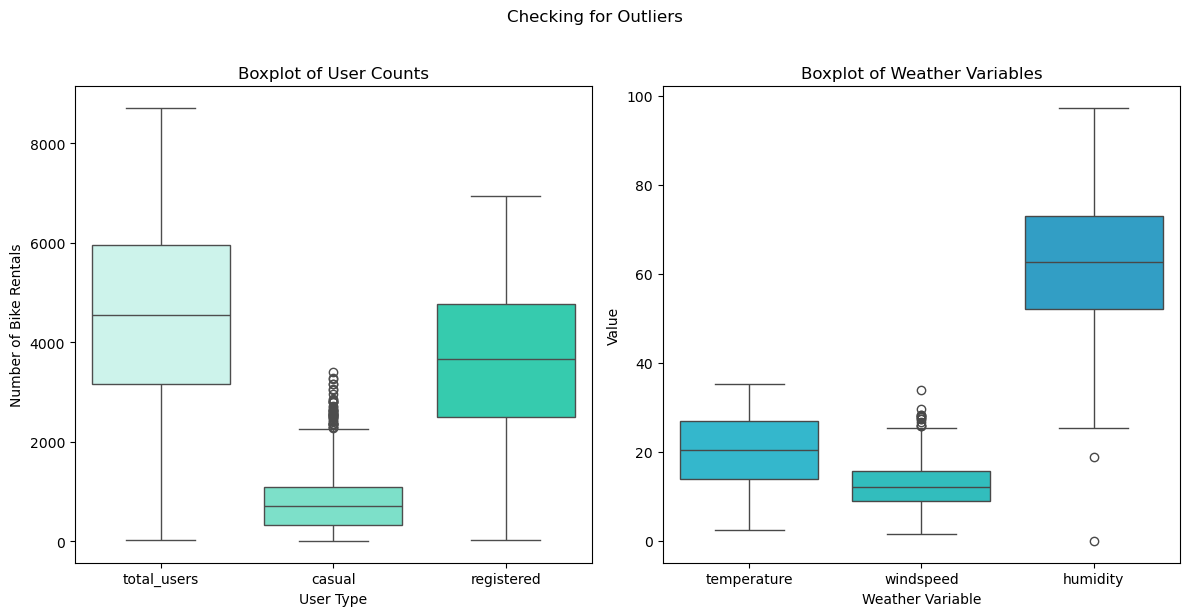

In [11]:

custom_colors = ['#C7F9EE', '#6DF0D2', '#1DE4BD', '#1AC9E6', '#1BD4D4', '#19AADE', '#176BA0', '#142459']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Boxplot for total_users, casual, and registered
sns.boxplot(data=df[["total_users", "casual", "registered"]], ax=ax1, palette=custom_colors[:3])
ax1.set_title('Boxplot of User Counts')
ax1.set_xlabel('User Type')
ax1.set_ylabel('Number of Bike Rentals')

# Boxplot for temperature, windspeed, and humidity
sns.boxplot(data=df[["temperature", "windspeed", "humidity"]], ax=ax2, palette=custom_colors[3:])
ax2.set_title('Boxplot of Weather Variables')
ax2.set_xlabel('Weather Variable')
ax2.set_ylabel('Value')

# Overall title for the entire subplot
fig.suptitle('Checking for Outliers', y=1.02)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


For me to begin the analysis, I used a boxplot to find the dataset's outliers. Upon concentrating on the factors wind speed, humidity, and casual users, it emerged that these features contain outliers. Despite their presence, an in-depth look at the dataset revealed that these outliers do not have a substantial impact on subsequent analyses.

In [12]:
# Create two separate DataFrames for each year
df_2011 = df[df['year'] == 0]
df_2012 = df[df['year'] == 1]

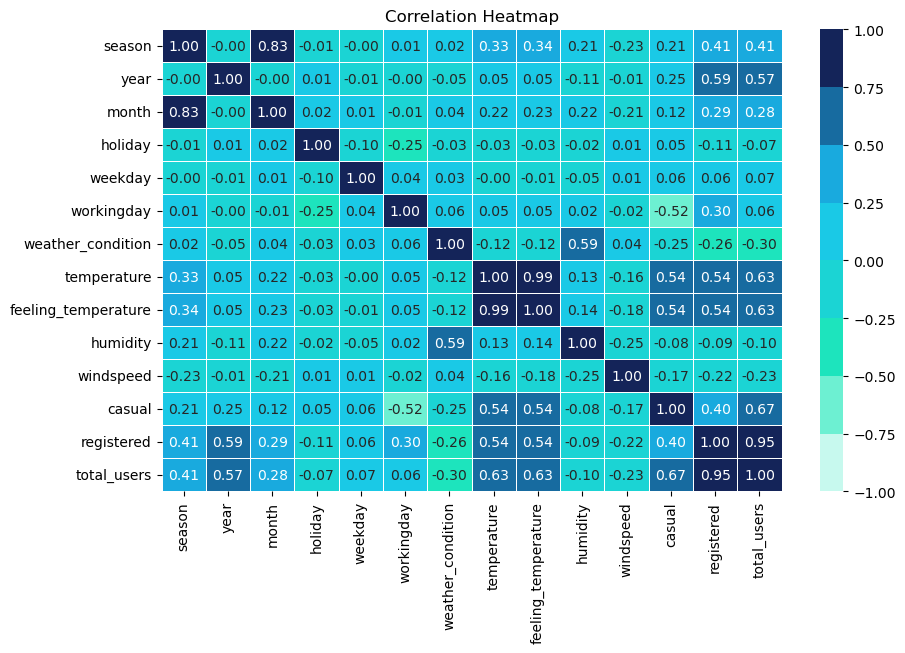

In [13]:
# Define your custom color scheme from lightest to darkest
custom_colors = ['#C7F9EE', '#6DF0D2', '#1DE4BD', '#1BD4D4', '#1AC9E6', '#19AADE', '#176BA0', '#142459']

cmap_custom = ListedColormap(custom_colors)

df_corr = df[['season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather_condition', 'temperature', 'feeling_temperature',
       'humidity', 'windspeed', 'casual', 'registered', 'total_users']]

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap
sns.heatmap(corr_matrix, cmap=cmap_custom, annot=True, fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

plt.title("Correlation Heatmap")
plt.show()


This correlation heatmap was constructed to guide the relationships bewtween the numeric variable, serving as a outline of the relationships.

1. Strong positive relations between:
- total users and registered
- total users and casual
- temperature and feeling_temperature
- season and month
- total users with temperature and feeling_temperature
- weather condition and humidity

weak relationships to explore:
- temperature, feeling_temperature, humidity accross months
- temperature, feeling_temperature, humidity accross seasons


2. strong neagtive relationship between:
- working day and casual 
- weathersit and total_users, registered, casual
- windspeed and humidity
- working day and holiday
- windspeed and season

In [14]:
# Create two separate DataFrames for each year
df_2011 = df[df['year'] == 0]
df_2012 = df[df['year'] == 1]

## 1. What is the trend in total users throughout the year, and are there specific patterns or spikes?

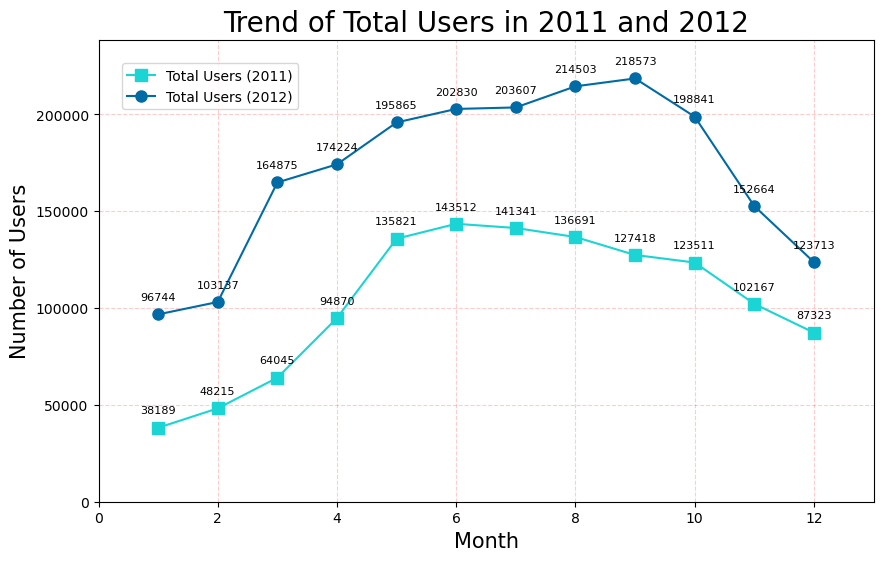

In [15]:

# Group by month and sum the user counts for each year
monthly_data_2011 = df_2011.groupby('month')['total_users'].sum().reset_index()
monthly_data_2012 = df_2012.groupby('month')['total_users'].sum().reset_index()

# Set size of the plot
plt.figure(figsize=(10, 6))

# Set style of the plot
plt.style.use('tableau-colorblind10')

# Set title for the plot (with fontsize change)
plt.title('Trend of Total Users in 2011 and 2012', fontsize=20)

# Set labels for x-axis and y-axis (with fontsize change)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Users', fontsize=15)

# Set font size of ticks on the x-axis and y-axis
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set ranges for the x-axis and y-axis
plt.xlim(left=0, right=13)
plt.ylim(bottom=0, top=max(monthly_data_2011['total_users'].max(), monthly_data_2012['total_users'].max()) + 20000)

# Turn grid on or off (0 = off, 1 = on)
plt.grid(c='r', alpha=0.2, linestyle='--')

# Plotting the line for total_users in 2011
plt.plot(monthly_data_2011['month'], monthly_data_2011['total_users'], 's-', label='Total Users (2011)', markersize=8, color='#1BD4D4')

# Plotting the line for total_users in 2012
plt.plot(monthly_data_2012['month'], monthly_data_2012['total_users'], 'o-', label='Total Users (2012)', markersize=8)

# Display Data Labels for Total Users in 2011
for x, y in zip(monthly_data_2011['month'], monthly_data_2011['total_users']):
    label = f"{y:.0f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

# Display Data Labels for Total Users in 2012
for x, y in zip(monthly_data_2012['month'], monthly_data_2012['total_users']):
    label = f"{y:.0f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

# Set the location of the legend
plt.legend(loc=(0.03, 0.85))

# Display the plot
plt.show()

In 2012, there was a noticeable increase in bike users, which is expected given the bike-sharing company's one-year presence in the field. The user peak occurred in September, reaching 218,573, while January marked the lowest point at 96,744. Despite this low, it still represented an improvement from December 2011. In 2011, bike rentals peaked in June at 143,512 users. An interesting trend emerged within the first five months of launch, witnessing exponential growth from 36,189 to 135,821 users. This suggests an initial enthusiasm for the bike-sharing concept, but starting from April 2011, there has been a general decline in numbers, indicating a waning of the initial hype. Additionally this be an indication of a successful service launch. Notably, there was a spike in February to March 2012, understanding that there was only one holiday - President's Day in February, it is very unlikely that a singualr holiday or a weather situation was able to contribute to such a steep spike, thus, concluded that there a successful marketing or promotional campaign that garnered that large number of riders. This strategy should be studied and applied into future marketing or promotional techniques.

## 2. Which day of the week experiences the highest average bike rentals?




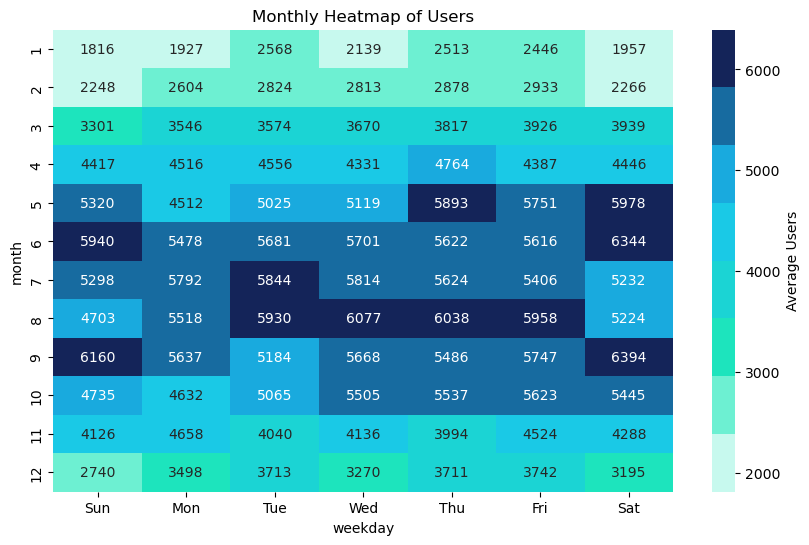

In [16]:


# Monthly heatmap for atemp
monthly_heatmap_atemp = df.groupby(['month', 'weekday'])['total_users'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_heatmap_atemp, cmap=cmap_custom, annot=True, fmt=".0f", cbar_kws={'label': 'Average Users'})

# Customize x-axis labels
plt.xticks([i + 0.5 for i in range(7)], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat' ])  # Fixing the syntax for set_xticks

plt.title("Monthly Heatmap of Users")
plt.show()
# changes to green yellow pallette

This heatmap offers insights into the gernally preferred days for bike rentals across the months in the two-year span. June stands out as the peak month, consistently hosting the highest average number of bike rentals. The weekends in June draw a substantial user base. Additionally, Wednesdays, Thursdays, Fridays, and Saturdays in August demonstrate heightened demand. Noteworthy is the observation that Sundays in September record the highest total usage. Conversely, from November to April, bike rentals exhibit a downturn, remaining consistently below 5,000 rentals each day of the week. Despite the seasonal decline, Saturdays persist as the most active day.

## 3. During which months do we observe the highest and lowest average bike rentals?



In [17]:
monthly_rentals = df.groupby('month')[['total_users', 'registered', 'casual']].sum().reset_index()
monthly_registered_users = monthly_rentals['registered']
monthly_casual_users = monthly_rentals['casual']

In [18]:

# Assuming you have the necessary variables defined
data = monthly_rentals

# Set a specific color for the entire chart
color = '#1BD4D4'

fig = px.bar(data, x='month', y='total_users',
             labels={'total_users': 'Total Bike Rentals'},
             title='Total Bike Rentals by Month',
             color_discrete_sequence=[color])

# Add labels and annotations
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Bike Rentals',
    legend_title='Legend',
    font=dict(size=12),
    annotations=[
        dict(
            x=data['month'][i],
            y=data['total_users'][i],
            text=f"{data['total_users'][i]:,.0f}",
            showarrow=True,
            arrowhead=4,
            ax=0,
            ay=-30
        ) for i in range(len(data))
    ]
)

fig.show()


The overall user activity follows a distinct pattern with low periods occurring in the first four months and the last two months of the year. On the other hand, May through September is the busiest time, and November through March are the slowest months for the number of users. This time-based information is crucial for setting maintenance schedules and campaign timing. Remarkably, August tops the list of months with the most orders—351,194—while January has the fewest orders—just 134,933—and the lowest user interaction. Comprehending these seasonal patterns is essential for maximising the use of available resources and strategic planning all year long.


## 4. How do the behaviours of casual and registered users differ?


In [19]:


# Calculate the percentage of casual and registered users
df['casual_percentage'] = (df['casual'] / df['total_users']) * 100
df['registered_percentage'] = (df['registered'] / df['total_users']) * 100

# Create a donut chart
fig = px.pie(df, names=['Casual Users', 'Registered Users'], 
             values=[df['casual_percentage'].mean(), df['registered_percentage'].mean()],
             title='Percentage of Casual and Registered Users',
             hole=0.3,  # Set hole to create a donut chart
             color_discrete_sequence=['#1BD4D4', '#C7F9EE'])  # Set colors for each category

# Show the plot
fig.show()


This analysis presents a comprehensive view of the user demographic for bike rentals, The fact that 82.4% of users have registered is noteworthy and suggests that the growth can be sustained. Because registered users are more likely to return and use the app frequently, the high registration rate points to the possibility of enhanced customer retention. Customer retention strategies may be strengthened by delving deeper into the needs and preferences of registered users.

Conversely, the presence of 17.6% of casual users indicates the accessibility of the bikes, possibly stemming from spontaneous decisions to use the bikes upon seeing them. This creates a space for analysis to learn more about the causes and conditions of casual usage. By examining this group, Leo Bike Share Co. may be able to gain knowledge about how to decrease the number of infrequent users, persuade them to register, or promote more registrations from this group. 

By catering to the unique requirements and concerns of both registered and casual users, the bike rental service can improve its strategy to accommodate a wider range of user preferences and support long-term expansion.

In [20]:
monthly_rentals = df.groupby('month')[['total_users', 'registered', 'casual']].sum().reset_index()
monthly_registered_users = monthly_rentals['registered']
monthly_casual_users = monthly_rentals['casual']


In [21]:
# Assuming you have a DataFrame named 'df' with columns 'casual', 'total_users', and 'month'
import pandas as pd

# Calculate the monthly percentage of casual users
df['casual_percentage'] = (df['casual'] / df['total_users']) * 100
df['registered_percentage'] = (df['registered'] / df['total_users']) * 100

# Group by month and calculate the mean percentage
monthly_casual_percentage = df.groupby('month')['casual_percentage'].mean().reset_index()
monthly_registered_percentage = df.groupby('month')['registered_percentage'].mean().reset_index()

# Display the result
print(monthly_casual_percentage)


    month  casual_percentage
0       1           8.756950
1       2          10.377253
2       3          18.483834
3       4          21.698036
4       5          22.195428
5       6          20.907723
6       7          22.836857
7       8          20.875374
8       9          19.865102
9      10          17.765350
10     11          14.874325
11     12          11.730888


In [22]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))

bar1 = sns.barplot(x=monthly_rentals['month'], y=monthly_rentals['registered'], data=monthly_registered_users, color='#1BD4D4', label='Registered Users')
bar2 = sns.barplot(x=monthly_rentals['month'], y=monthly_rentals['casual'], data=monthly_casual_users, color='#C7F9EE', label='Casual Users', bottom=monthly_rentals['registered'])

plt.title('Registered vs Casual Bike Rentals by Month', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Total Bike Rentals', fontsize=15)

# Create a function to display data labels/annotations for each bar
def autolabel_registered(bars, data_values):
    for bar, value in zip(bars.patches, data_values):
        height = bar.get_height()
        plt.annotate(f'{value:.2f}%', 
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, -50),  # 2 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=8)

def autolabel_casual(bars, data_values):
    for bar, value in zip(bars.patches, data_values):
        height = bar.get_height() + monthly_registered_percentage['registered_percentage'][bars.patches.index(bar)]
        plt.annotate(f'{value:.2f}%', 
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 2),  # 2 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=8)

# Calculate the mean percentage for each month
monthly_registered_percentage = df.groupby('month')['registered_percentage'].mean().reset_index()
monthly_casual_percentage = df.groupby('month')['casual_percentage'].mean().reset_index()

# Call autolabel functions for both sets of bars
autolabel_registered(bar1, monthly_registered_percentage['registered_percentage'])
autolabel_casual(bar2, monthly_casual_percentage['casual_percentage'])

plt.legend(loc=(0.03, 0.83))
plt.show()


TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 1000x600 with 0 Axes>

In general, registered users consistently make up at least 77% of the total users each month. Notably, in January, they constituted the largest percentage at 91.24%, while in July, the registered user percentage was the lowest. This could imply a higher presence of casual users in July. Over the year, there is a trend of an increasing percentage of casual riders in the first half, followed by a reduction towards the end of the year. This shift could be attributed to the impact of end-of-year holidays, such as Thanksgiving, Christmas, and New Year, widely celebrated in Washington D.C. Further justification for this claim can be explored through other visualizations in the report.

As an overall trend, August emerges as the month with the highest number of total users. This observation prompts further investigation into the factors contributing to heightened user activity during August. By delving into the specifics of user behaviour, preferences, and external factors during this period, a deeper understanding can be gained to inform strategies for replicating or enhancing such success in other months.

## 5. What is the behaviour of registered users, and what are the distinctive usage patterns for this group?

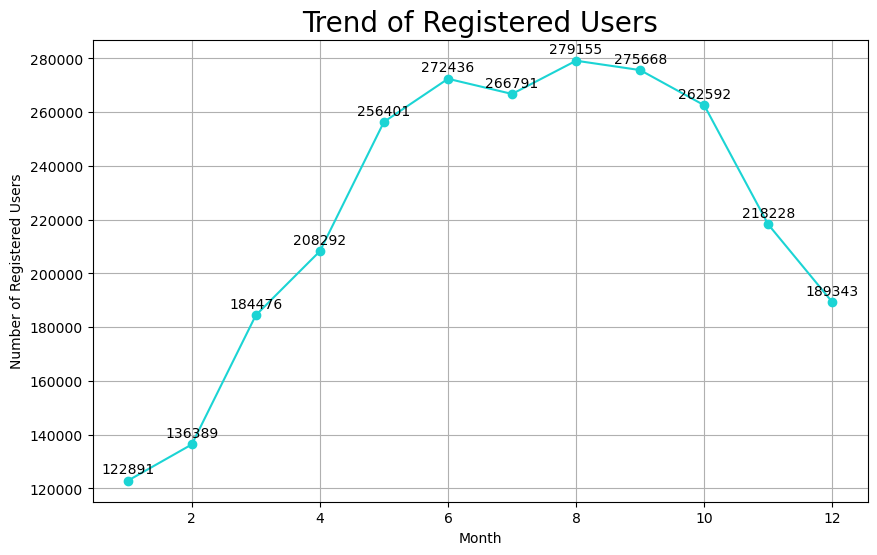

In [23]:
# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Group by month and sum the user counts
monthly_registered_data = df.groupby('month')['registered'].sum().reset_index()

# Extracting month and user counts
month = monthly_registered_data['month']
registered = monthly_registered_data['registered']

# Plot the data
ax.plot(month, registered, color='#1BD4D4', marker='o', label='Trend of Registered Users')

# Annotate points with user counts
for i, txt in enumerate(registered):
    ax.annotate(txt, (month[i], registered[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10)

# Set title and labels
ax.set_title('Trend of Registered Users', fontsize=20)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Registered Users')

# Customize gridlines
ax.grid(True)

# Show the plot
plt.show()


The entire trend of registered users for every month of the year is depicted in this line graph. August is the month with the highest number of registered users (279,155), while the lowest number is recorded at the beginning of the year (122,891). For registered users, the pattern often denotes a lower beginning and stopping point. Furthermore, there appears to be a minor decline in the number of registered users in July, which warrants additional research into the fundamental causes of this occurrences. The goal of the analysis is to identify the variables that led to the July reduction in the number of registered users and to investigate possible solutions to stop or lessen this decline.


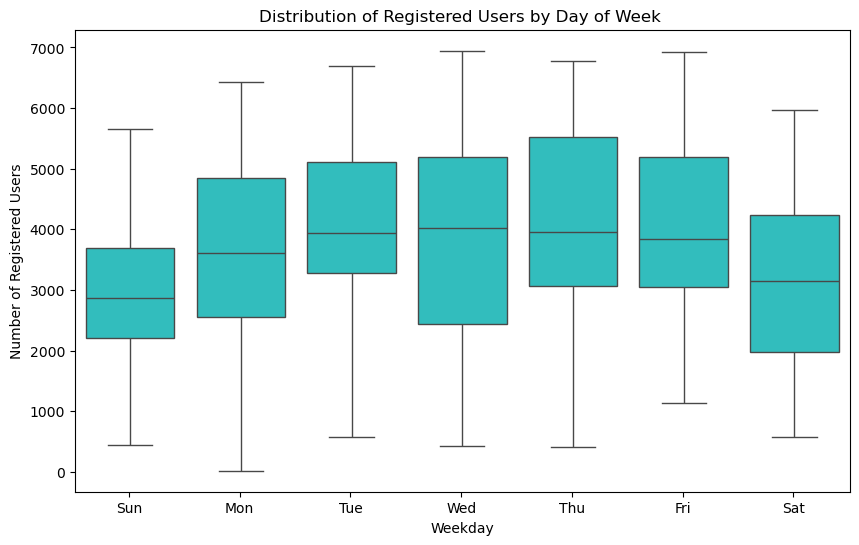

In [24]:
plt.subplots(figsize=(10, 6))
# Create a scatter plot
sns.boxplot(x='weekday', y='registered', data=df, color='#1BD4D4')

# Customize the plot
plt.title('Distribution of Registered Users by Day of Week ')
plt.xlabel('Weekday')
plt.ylabel('Number of Registered Users')

# Customize x-axis labels
plt.xticks([i - 0.01 for i in range(7)], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])  # Fixing the syntax for set_xticks


# Show the plot
plt.show()

This plot is designed to comprehend the distribution of registered users throughout each day of the week. The pivotal discovery is that a larger number of registered users utilise the bike-sharing service predominantly on weekdays. Given that weekdays correspond to working days, it can be inferred that registered users primarily employ the bike-sharing service as their commuting mode to work. Understanding the usage patterns and specific requirements of these registered users is paramount for Leo Bike Share Co's sustainable growth.

It is critical for the company to tailor its services to the needs of registered users, ensuring an adequate presence of bike stations and parking facilities, especially in common and central business districts. This strategic approach not only addresses the demands of registered users but also aligns with a sustainable ethos, promoting cycling as a preferable alternative to driving to and from work. By fostering a supportive environment, Leo Bike Share Co not only enhances its services for registered users but also actively contributes to the promotion of cycling, presenting a compelling and justifiable choice for users in their daily commute.

## 6. Define the profiles and behaviors of casual users, emphasizing their unique characteristics in the bike-sharing context

([<matplotlib.axis.XTick at 0x1da1135cb10>,
 [Text(-0.01, 0, 'Sun'),
  Text(0.99, 0, 'Mon'),
  Text(1.99, 0, 'Tue'),
  Text(2.99, 0, 'Wed'),
  Text(3.99, 0, 'Thu'),
  Text(4.99, 0, 'Fri'),
  Text(5.99, 0, 'Sat')])

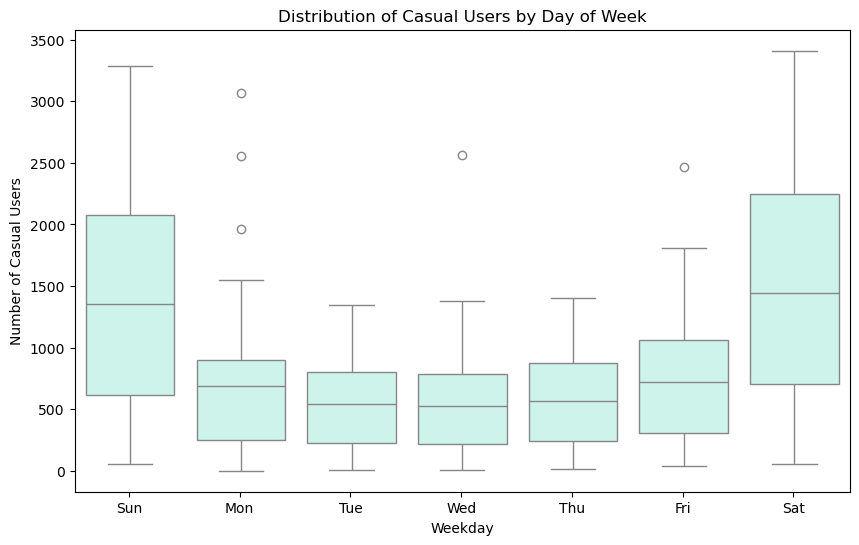

In [25]:
plt.subplots(figsize=(10, 6))

sns.boxplot(x='weekday', y='casual', data=df, color='#C7F9EE')

# Customize the plot
plt.title('Distribution of Casual Users by Day of Week')
plt.xlabel('Weekday')
plt.ylabel('Number of Casual Users')

# Customize x-axis labels
plt.xticks([i - 0.01 for i in range(7)], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])  # Fixing the syntax for set_xticks



The distribution of casual users over the week has been examined using the box and whisker plot. The most important conclusion drawn from this graphic depiction is that most casual customers use bike-sharing services mostly on the weekends. Based on this finding, it appears that casual users frequently choose to go on leisure bike rides, maybe for fun. Weekends are a great time for people to perform fun, health-focused activities because they are a time when people usually have fewer job commitments.

With this knowledge, Leo Bike Share Co. can make use of this window of opportunity to attract casual users. Weekend promotions may work especially well to turn casual users into registered users, which will strengthen their loyalty and encourage them to utilise the bike-sharing service again. Notably, Mondays, Wednesdays, and Fridays are also when outliers are seen. More research is needed to identify the precise causes of these anomalies and to develop focused tactics that correspond with the trends seen during these specific workdays.



## 7. How could I understand the recorded climate factors in Washington D.C.?

In [26]:
# Group by 'month' and aggregate 'feeling_temperature' and 'temperature'
grouped_df = df.groupby('month')[['feeling_temperature', 'temperature']].mean().reset_index()

# Extract values for 'month', 'feeling_temperature', and 'temperature'
month = grouped_df['month'].values
ftemp = grouped_df['feeling_temperature'].values
temp = grouped_df['temperature'].values


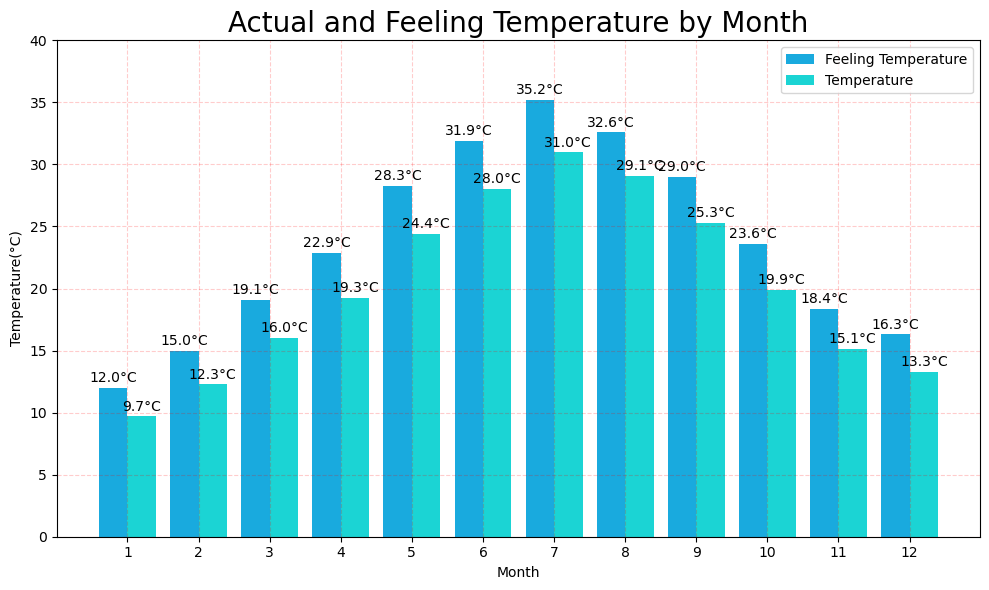

In [27]:

# Set the label locations and width of the bars
x = np.arange(len(month))  
width = 0.40

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot side-by-side bars, 
bar1 = ax.bar(x - width/2, ftemp, width, label='Feeling Temperature', color = '#19AADE')
bar2 = ax.bar(x + width/2, temp, width, label='Temperature', color='#1BD4D4')

# Customise the plot
ax.set_title('Actual and Feeling Temperature by Month', fontsize = 20)
ax.set_ylabel('Temperature(°C)', fontsize = 10)
ax.set_xlabel('Month', fontsize = 10)
ax.set_xticks(x)
ax.set_xticklabels(month)
ax.set_ylim(bottom = 0, top = 40)
ax.legend()

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
        height = each.get_height()
        ax.annotate('{:.1f}'.format(height) + '°C',
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        
# Use function to display data labels for both bars
autolabel(bar1)
autolabel(bar2)

# Turn grid on or off (0 = off, 1 = on)
plt.grid(c='r', alpha=0.2, linestyle='--')

# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

The largest variation between the "feels like" temperature and the actual temperature is observed in July, with a difference of 4.2 degrees Celsius. This discrepancy suggests that July experiences higher humidity levels, as increased moisture in the air slows down the evaporation of perspiration from the human body. Consequently, the body is less efficient in cooling down, leading to a perceived temperature that feels hotter than the actual temperature.

It makes sense to use the "feels like" temperature as a meaningful measure moving forward in light of the considerable that the overall temperature trend is not significantly different. This choice simplifies the study because it is per the perceived temperature, which takes into consideration variables like wind, humidity, and other meteorological elements that affect how users perceive the weather.


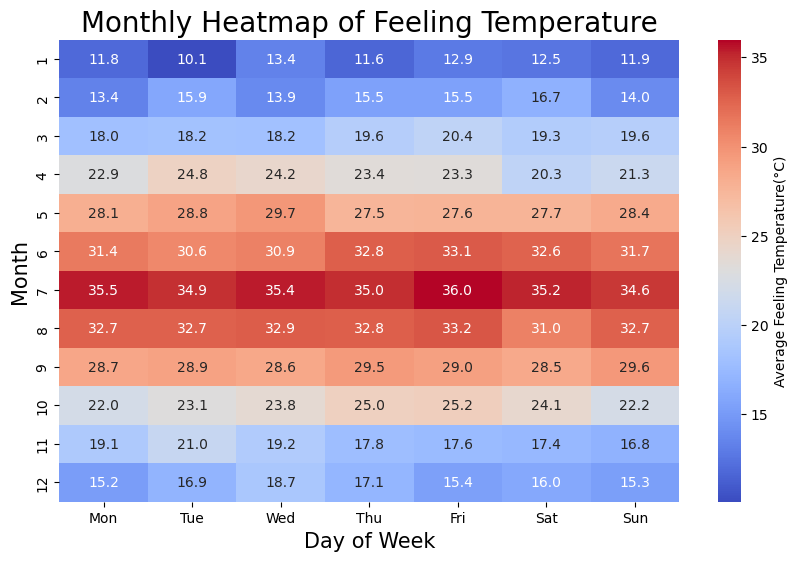

In [28]:
# Monthly heatmap for atemp
monthly_heatmap_atemp = df.groupby(['month', 'weekday'])['feeling_temperature'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_heatmap_atemp, cmap="coolwarm", annot=True, fmt=".1f", cbar_kws={'label': 'Average Feeling Temperature(°C)'})

# Customize x-axis labels
plt.xticks([i + 0.5 for i in range(7)], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Fixing the syntax for set_xticks
plt.xlabel('Day of Week', fontsize=15)  # Fixing the syntax for set_xlabel
plt.ylabel('Month', fontsize=15)  # Fixing the syntax for set_ylabel

plt.title("Monthly Heatmap of Feeling Temperature", fontsize=20)
plt.show()


Feeling temperature refers to the temperature a human is able to feel and could differ from the actual temperature.July was recorded as the hottest months of the year with temperature greater than 34 degree celcius. With January, recorded the avergae lowest month with temperatures of 10 to 13 degrees celcius.

In [29]:
num_of_days_weather = df.groupby('weather_condition')['instant'].sum()
weather_type = num_of_days_weather.index

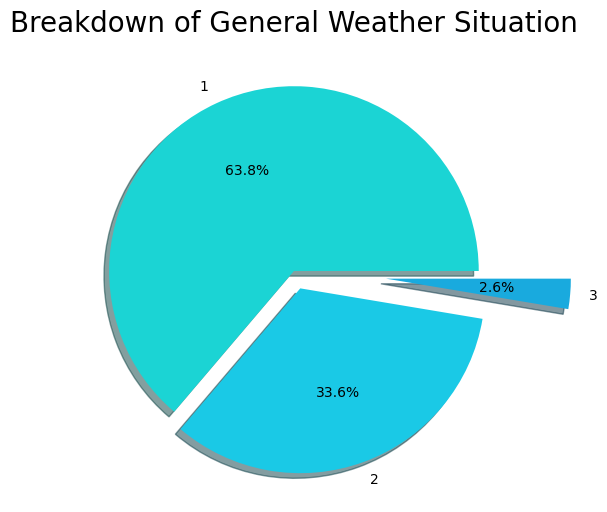

In [30]:
fig, ax1 = plt.subplots(figsize=(10, 6))

pie = ax1.pie(num_of_days_weather, labels=weather_type, autopct='%1.1f%%', explode=(0, 0.1, 0.5), shadow = True, colors=[ '#1BD4D4', '#1AC9E6', '#19AADE'])

# Add a title
ax1.set_title('Breakdown of General Weather Situation', fontsize=20)


# Display percentage values
for text in pie[1]:
    text.set_fontsize(10)

# Show the plot
plt.show()

Weather condition 1 dominates the majority of days, making up 63.8% of the overall weather conditions. This prevalence could be an important variable contributing to the largest number of users during weather condition 1. On the other hand, there are roughly ten days in a year with weather condition 3. Comprehending this association highlights the significance of weather patterns in shaping bike rental trends and offers insights into the relationship between particular weather conditions and user engagement.


In [31]:
num_of_day = df.groupby('season')['instant'].sum()
season = num_of_day.index


In [32]:

fig, ax1 = plt.subplots(figsize=(10, 6))

pie = ax1.pie(num_of_day, labels=season, autopct='%1.1f%%', explode=(0, 0, 0, 0.1), shadow = True, colors=['#1BD4D4', '#1AC9E6', '#19AADE', '#176BA0'])

# Add a title
ax1.set_title('Breakdown of Season', fontsize=20)


# Display percentage values
for text in pie[1]:
    text.set_fontsize(10)

# Show the plot
plt.show()

This pie chart illustrates the distribution of days across different seasons. Winter emerges as the longest season, encompassing 32.8% of the year, equivalent to approximately 120 days. In contrast, spring spans the fewest days, comprising around 65 days, which is half the duration of winter. This breakdown provides a concise overview of the relative lengths of each season, offering insights into the temporal distribution of weather conditions throughout the year.

## 8. Is there a correlation between higher windspeed and decreased bike rentals on specific days and how significant is this correlation?



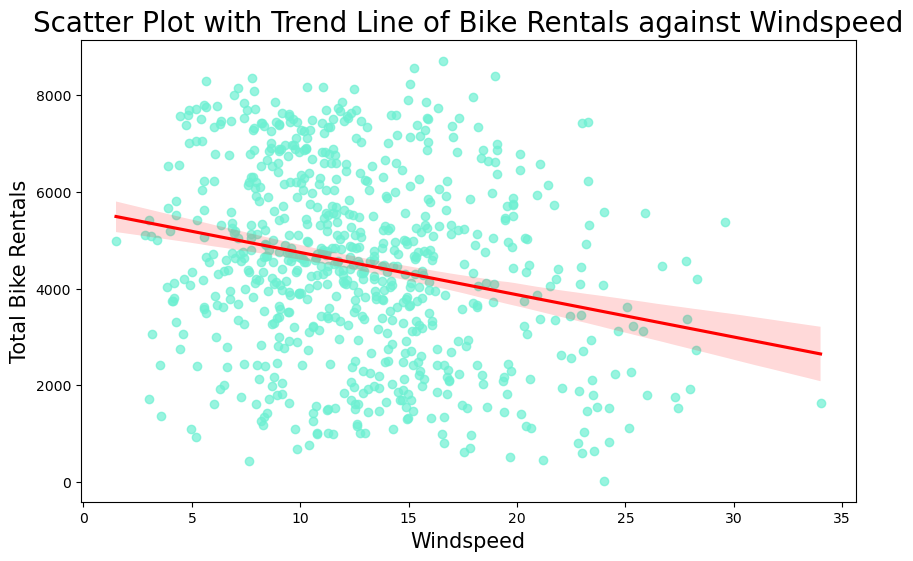

In [33]:
plt.figure(figsize=(10, 6))
sns.regplot(x='windspeed', y='total_users', data=df, scatter_kws={'alpha':0.7, 'color':'#6DF0D2'}, line_kws={'color':'red'})
plt.title('Scatter Plot with Trend Line of Bike Rentals against Windspeed', fontsize = 20)
plt.xlabel('Windspeed', fontsize = 15)
plt.ylabel('Total Bike Rentals', fontsize = 15)
plt.show()

There is a negative correlation between windspeed and the number of users, where an increase in windspeed corresponds to a decrease in the number of users. The ideal windspeed for bike rentals appears to fall within the range of 5 to 15 kilometres per hour. Understanding this relationship is crucial for anticipating user preferences and enhancing bike-sharing services during varying windspeed conditions.

In [34]:
# Filter data for the years 2011 and 2012
df_filtered = df.groupby('month_year')[['humidity', 'feeling_temperature', 'windspeed', 'temperature']].mean().reset_index()
df_filtered


month_year   humidity  feeling_temperature  windspeed  temperature
0    Apr 2011  66.829667            22.838667  16.362667    19.318333
1    Apr 2012  50.784667            22.869333  15.057667    19.221333
2    Aug 2011  62.683548            32.770645  12.778710    28.920000
3    Aug 2012  64.862903            32.376129  10.393226    29.184194
4    Dec 2011  64.918387            16.494839  11.258710    13.332258
5    Dec 2012  68.290323            16.123226  12.406129    13.238065
6    Feb 2011  56.009286            14.220714  15.314643    11.584643
7    Feb 2012  57.458621            15.726897  13.617586    12.929310
8    Jan 2011  58.436774            10.224516  13.093548     8.106452
9    Jan 2012  58.730323            13.754516  14.551290    11.282581
10   Jul 2011  58.966774            35.532903  11.501613    31.101613
11   Jul 2012  60.609677            34.876129  10.750323    30.847097
12   Jun 2011  59.325000            32.328000  11.939000    28.417000
13   Jun 2012  55.837000            31.497000  12.907333    27.679667
14   Mar 2011  56.942258            16.265484  15.571613    13.598387
15   Mar 2012  60.754516            21.930323  14.270968    18.426129
16   May 2011  71.337419            27.541290  12.145484    23.666452
17   May 2012  66.456452            29.026129  12.374839    25.107419
18   Nov 2011  67.531667            19.965667  12.124000    16.496000
19   Nov 2012  57.445333            16.769667  12.506667    13.781333
20   Oct 2011  70.680968            22.939032  11.770645    19.268387
21   Oct 2012  68.073226            24.259677  11.706774    20.502903
22   Sep 2011  78.406667            28.428000  10.250333    25.130000
23   Sep 2012  64.538000            29.502000  11.985333    25.424000

In [35]:

# Convert 'month_year' column to datetime format
df_filtered['month_year'] = pd.to_datetime(df_filtered['month_year'], format='%b %Y')

# Sort the DataFrame based on the 'month_year' column
df_filtered = df_filtered.sort_values('month_year')

# Plotting the line chart for windspeed
fig = px.line(df_filtered, x='month_year', y='windspeed',
              labels={'month_year': 'Month', 'windspeed': 'Windspeed'},
              title="Windspeed Over Time",
              line_shape='linear',
              color_discrete_map={'windspeed': '#1AC9E6'})

# Customize layout
fig.update_layout(yaxis_title="Windspeed", xaxis_title="Month")

# Show the plot
fig.show()


Generally, the windspeeds are the highest from January to April and hit a low in August. This align with how August had the most number of users and the fact that lower the windspeed, the higher the number of users

## 9. How does the combination of high humidity and temperature influence the number of bike rentals, and is there a discernible pattern in their interplay?

In [36]:

# Convert 'month_year' column to datetime format
df_filtered['month_year'] = pd.to_datetime(df_filtered['month_year'], format='%b %Y')

# Sort the DataFrame based on the 'month_year' column
df_filtered = df_filtered.sort_values('month_year')

# Plotting the line chart for temperature
fig = px.line(df_filtered, x='month_year', y='temperature',
              labels={'month_year': 'Month', 'temperature': 'Temperature'},
              title="Temperature Over Time",
              line_shape='linear',
              color_discrete_map={'temperature': '#1AC9E6'})

# Customize layout
fig.update_layout(yaxis_title="Temperature(°C)", xaxis_title="Month")

# Show the plot
fig.show()


In [37]:

# Convert 'month_year' column to datetime format
df_filtered['month_year'] = pd.to_datetime(df_filtered['month_year'], format='%b %Y')

# Sort the DataFrame based on the 'month_year' column
df_filtered = df_filtered.sort_values('month_year')

# Plotting the line chart for humidity
fig = px.line(df_filtered, x='month_year', y='humidity',
              labels={'month_year': 'Month', 'humidity': 'Humidity'},
              title="Humidity Over Time",
              line_shape='linear',
              color_discrete_map={'humidity':'#176BA0'})

# Customize layout
fig.update_layout(yaxis_title="Humidity", xaxis_title="Month")

# Show the plot
fig.show()


In [38]:
plt.figure(figsize=(10, 6))
sns.regplot(x='humidity', y='total_users', data=df, scatter_kws={'alpha':0.7, 'color':'#6DF0D2'}, line_kws={'color':'red'})
plt.title('Scatter Plot with Trend Line of Bike Rentals against Humidity', fontsize = 20)
plt.xlabel('Humidity', fontsize = 15)
plt.ylabel('Total Bike Rentals', fontsize = 15)
plt.show()

The highest number of bike rentals occurred when the humidity was approximately 50, while the lowest rentals happened when humidity exceeded 80. Additionally, extremely low rentals were observed when humidity fell below 20. These patterns indicate a negative correlation between humidity and the number of bike rentals, with the frequency decreasing as humidity levels increase. Identifying this relationship is essential for understanding the impact of humidity on user behavior and for tailoring bike-sharing services to varying humidity conditions.

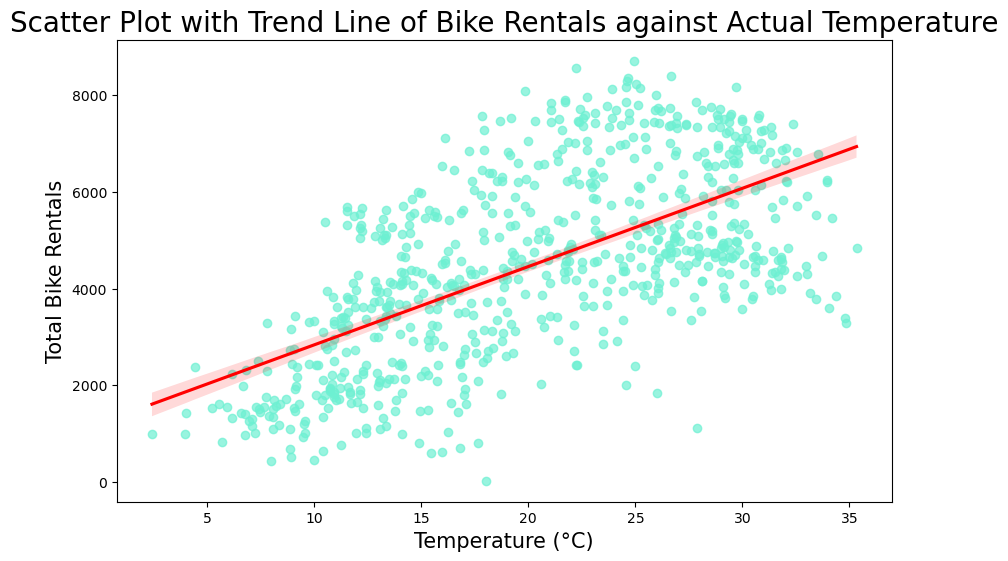

In [39]:
plt.figure(figsize=(10, 6))
sns.regplot(x='temperature', y='total_users', data=df, scatter_kws={'alpha':0.7, 'color':'#6DF0D2'}, line_kws={'color':'red'})
plt.title('Scatter Plot with Trend Line of Bike Rentals against Actual Temperature', fontsize = 20)
plt.xlabel('Temperature (°C)', fontsize = 15)
plt.ylabel('Total Bike Rentals', fontsize = 15)
plt.show()

As the temperature increasese to the maximum being 36 degrees celcius, the numebr of users increases. The ideal temperature is about bettween 20 and 30 degrees celcius 

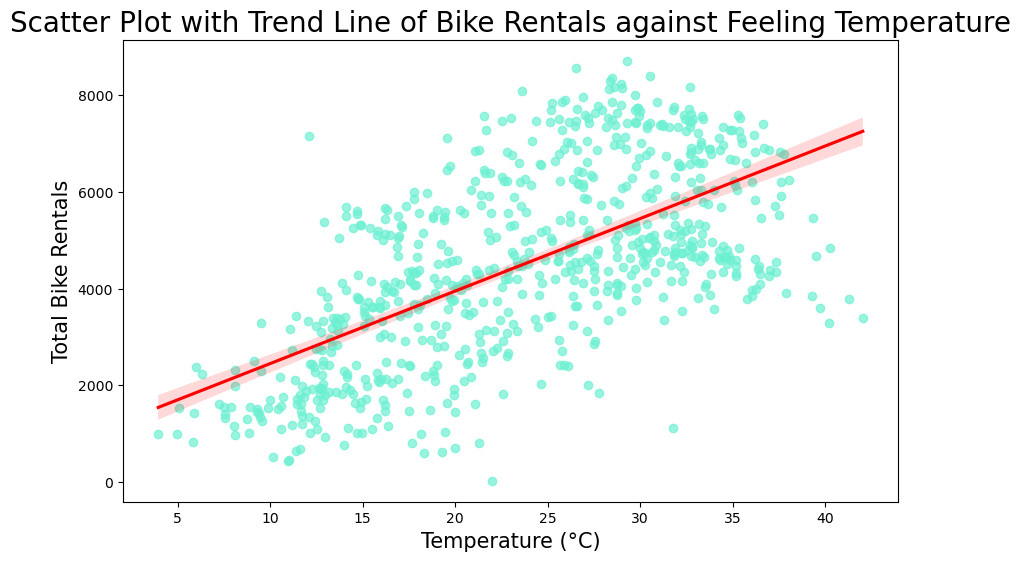

In [40]:
plt.figure(figsize=(10, 6))
sns.regplot(x='feeling_temperature', y='total_users', data=df, scatter_kws={'alpha':0.7, 'color':'#6DF0D2'}, line_kws={'color':'red'})
plt.title('Scatter Plot with Trend Line of Bike Rentals against Feeling Temperature', fontsize = 20)
plt.xlabel('Temperature (°C)', fontsize = 15)
plt.ylabel('Total Bike Rentals', fontsize = 15)
plt.show()

## 10. During which season should Leo Bike Share Co. consider increasing the number of available bikes for rental, and what data supports this decision?


C:\Users\sahan\AppData\Local\Temp\ipykernel_35532\2551608254.py:13: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



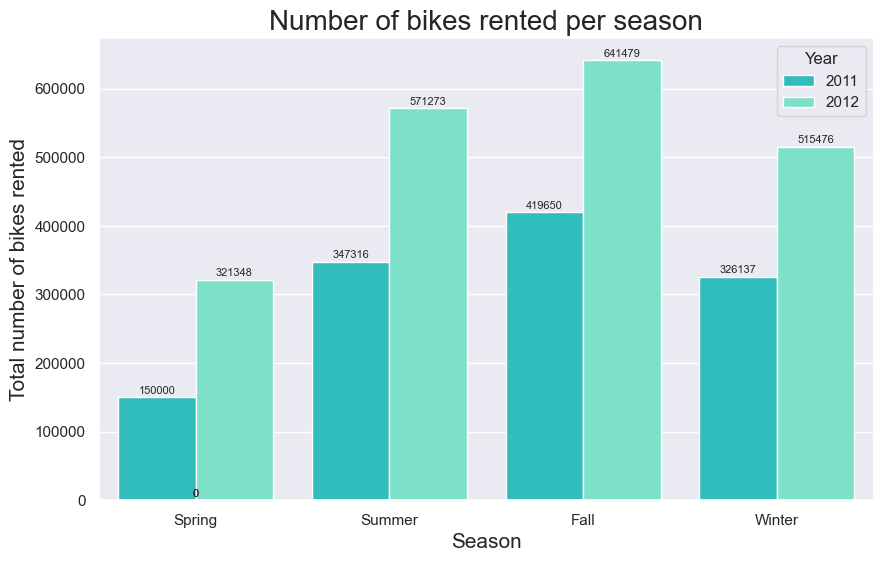

In [41]:
# Assuming you have the necessary variables defined
season_data = df.groupby(['season', 'year', 'year_str'])['total_users'].sum().reset_index()

# Define your custom color palette
cmap_custom = ['#1BD4D4', '#6DF0D2', '#C7F9EE', '#1AC9E6']

# Define custom labels for legend and x-axis
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
year_labels = {0: '2011', 1: '2012'}

sns.set()
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="season", y="total_users", hue="year_str", data=season_data, palette=cmap_custom
)

# Modify x-axis ticks
plt.xticks([0, 1, 2, 3], [season_labels[i] for i in [1, 2, 3, 4]])

plt.xlabel("Season", fontsize = 15)
plt.ylabel("Total number of bikes rented", fontsize = 15)
plt.title("Number of bikes rented per season", fontsize = 20)

# Set title for the legend
ax.legend(title="Year")

# Annotate each bar with the total number of bikes rented
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.show()


In 2011 and 2012, autumn comes out as the most popular season with 419,650 and 641,479 users, respectively. Spring, on the other hand, has the fewest users in both years, with 150,000 in 2011 and 321,348 in 2012. With a noteworthy 114% increase over the prior year, spring sees the highest percentage increase in consumers over the two years. Autumn is popular because of the perfect combination of weather and temperature. The fact that there are fewer days in each of the three seasons during the spring may be the reason for the decreased user count. It is essential to comprehend these seasonal fluctuations in order to optimise services and predict user preferences all year long.


## 11. What weather situations are most conducive to optimal bike rentals, and how can we leverage this information for operational improvements?

In [42]:
# Group by month and sum the user counts
weather_data = df.groupby('weather_condition')[['registered', 'casual']].sum().reset_index()

# Extracting month and user counts
weather = weather_data['weather_condition']
registered_users = weather_data['registered']
casual_users = weather_data['casual']

weather

0    1
1    2
2    3
Name: weather_condition, dtype: int64

In [43]:
# Group by month and sum the user counts
weather_data = df.groupby('weather_condition')['total_users'].sum().reset_index()

# Extracting month and user counts
weather = weather_data['weather_condition']
total_users = weather_data['total_users']


weather

0    1
1    2
2    3
Name: weather_condition, dtype: int64

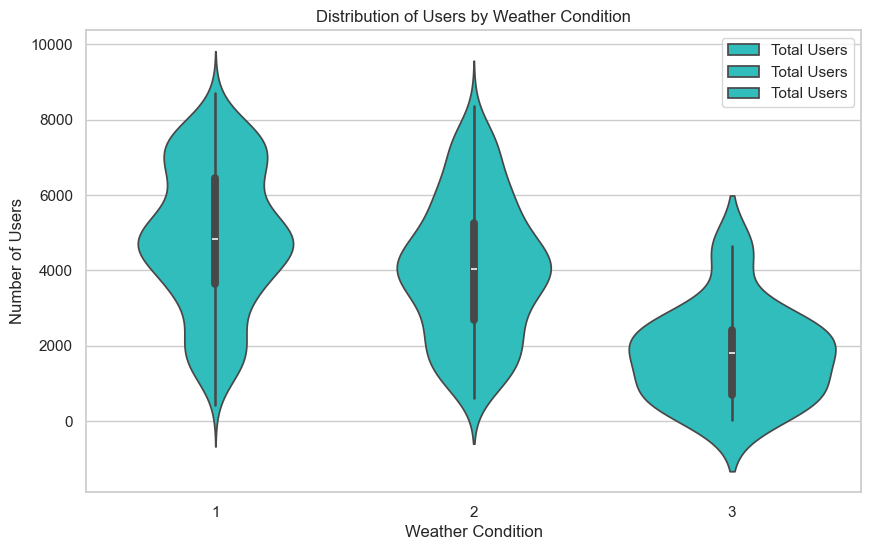

In [44]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a violin plot for registered users
sns.violinplot(x='weather_condition', y='total_users', data=df, ax=ax, color='#1BD4D4', label='Total Users')


# Set the title and labels
ax.set_title('Distribution of Users by Weather Condition')
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Number of Users')

# Get the artists (violins) from the axes
artists, labels = ax.get_legend_handles_labels()

# Show the plot
plt.show()


This violin plot compares the user preferences for bike riding across three recorded types of weather conditions. Weather condition 3, which includes Light Snow, Light Rain + Thunderstorm + Scattered clouds, and Light Rain + Scattered clouds, attracted the fewest users, with a mean of less than 200 riders. In contrast, weather condition 1, encompassing Clear, Few clouds, Partly cloudy, and Partly cloudy, emerged as the most ideal for users, with a mean of approximately 5000 users. In order to optimise user engagement across a range of weather circumstances, it is imperative to comprehend these trends and customise bike-sharing services to the weather conditions that appeal to users the most.

## 12. What was the impact and duration of Hurricane Sandy on bike rentals in Washington D.C.?


In [45]:


# Assuming you have the necessary variables defined
selected_period_df = df[(df['datetime'] >= '2012-09-01') & (df['datetime'] <= '2012-12-31')]

# Identify the start and end dates of the dips (adjust based on your data)
dip1_start_date = '2012-10-24'
dip1_end_date = '2012-11-04'

dip2_start_date = '2012-12-20'
dip2_end_date = '2012-12-31'

# Create figure
fig = go.Figure()

# Plot the trend using Plotly Express line chart
fig.add_trace(
    go.Scatter(x=selected_period_df['datetime'], y=selected_period_df['total_users'],
               mode='lines', name='Total Users Trend (Sep 2011 - Mar 2012)',
               line=dict(color='#176BA0'))
)

# Add circles to highlight the dips
dip1_circle = dict(
    type="circle",
    xref="x",
    yref="y",
    x0=dip1_start_date,
    y0=selected_period_df['total_users'].min(),
    x1=dip1_end_date,
    y1=selected_period_df['total_users'].max(),
    line=dict(color='#1BD4D4')
)

dip2_circle = dict(
    type="circle",
    xref="x",
    yref="y",
    x0=dip2_start_date,
    y0=selected_period_df['total_users'].min(),
    x1=dip2_end_date,
    y1=selected_period_df['total_users'].max(),
    line=dict(color='#1AC9E6')
)


# Update layout with the circles and title
fig.update_layout(
    shapes=[dip1_circle, dip2_circle],
    title="Total Users Trend with Highlighted Dips",
    xaxis_title="Date",
    yaxis_title="Total Users"
)

# Show the figure
fig.show()


This trend underscores a substantial decline in users, with the first notable dip occurring due to Hurricane Sandy on October 29, 2012. The hurricane led to a drastic drop in users from 7,852 to just 22. This sharp decline highlights the impact of adverse weather conditions on user engagement. Remarkably, by 1 November 2012, the numbers rebounded to 5,847 users, suggesting either users were from areas less affected or that, despite the adverse conditions, some individuals chose biking as a mode of transportation. Also, it shows Leo Bike Share Co.'s ability to rebouce suring times of adversity, acting as an indicator of business resilence.

Another significant dip is observed in December, likely attributable to the holiday season. Typically, year-end sees a reduction in the number of people in the state, either due to holiday travel or visits, resulting in a decrease in the user base for the bike-sharing service during this period. Understanding these fluctuations aids in anticipating and adapting to external factors that influence user behavior.

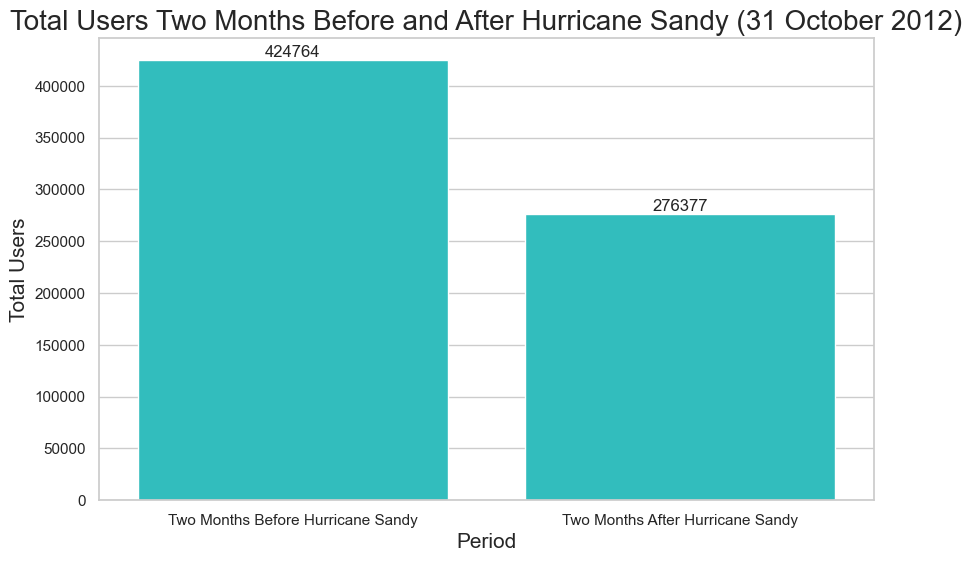

In [46]:
# Assuming df is your DataFrame
df['datetime'] = pd.to_datetime(df['datetime'])  # Ensure 'datetime' column is in datetime format

# Define the specific date
split_date = pd.to_datetime('2012-10-31')

# Filter data two months before and after the specific date
before_date_df = df[(df['datetime'] >= (split_date - pd.DateOffset(months=2))) & (df['datetime'] <= split_date)]
after_date_df = df[(df['datetime'] > split_date) & (df['datetime'] <= (split_date + pd.DateOffset(months=2)))]

# Aggregate total users for each period
total_users_before = before_date_df['total_users'].sum()
total_users_after = after_date_df['total_users'].sum()

# Define your custom color palette
cmap_custom = ['#1BD4D4', '#1AC9E6']

# Set the custom color palette
sns.set_palette(cmap_custom)

# Plot total users before and after the specific date using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=['Two Months Before Hurricane Sandy', 'Two Months After Hurricane Sandy'],
            y=[total_users_before, total_users_after])
plt.xlabel('Period', fontsize = 15)
plt.ylabel('Total Users', fontsize = 15)
plt.title('Total Users Two Months Before and After Hurricane Sandy (31 October 2012)', fontsize=20)

# Add annotations to display exact values on top of each bar
for i, value in enumerate([total_users_before, total_users_after]):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12)

plt.show()



This bar chart highlights the significant impact of Hurricane Sandy on the number of users. The dip in users is still evident almost two months after the hurricane, showcasing a substantial decrease. This lingering impact can potentially detrimentally affect user numbers during the subsequent low-year-end period. The drop amounts to around 35% of users, underscoring the lasting repercussions of climatic adversities on bike-sharing service utilisation.

## 13. How do bike rentals vary during major holidays in Washington D.C. and which holidays record the highest number of bike rentals?

In [47]:
monthly_holiday_rentals = df.groupby(['month', 'holiday'])[['total_users']].sum().reset_index()
print(monthly_holiday_rentals.columns)


Index(['month', 'holiday', 'total_users'], dtype='object')


In [48]:

monthly_holiday = monthly_holiday_rentals[monthly_holiday_rentals['holiday'] == 1]
monthly_not_holiday = monthly_holiday_rentals[monthly_holiday_rentals['holiday'] == 0]

# Plotting with Seaborn
plt.figure(figsize=(10, 6))

# Plot bars for not holiday users
not_holiday_bars = sns.barplot(x='month', y='total_users', data=monthly_not_holiday, color='#1BD4D4', label='Not Holiday Users')

# Plot bars for holiday users
holiday_bars = sns.barplot(x='month', y='total_users', data=monthly_holiday, color='#6DF0D2', label='Holiday Users')

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for bar in bars.patches:
        height = bar.get_height()
        plt.annotate('{:.0f}'.format(height), # how to convert to show an integer , use round function , x = round(5.76543, 2)
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 2),  # 2 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)

# Call autolabel function for both sets of bars
autolabel(not_holiday_bars)
autolabel(holiday_bars)

plt.title('Total Bike Rentals by Month and Holiday', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Total Bike Rentals', fontsize=15)
plt.legend(loc=(0.03, 0.83))
plt.show()


July had the most number of users during the holidays in that month, while September marked the peak for users on non-holiday dates. Conversely, December stood out with the lowest user engagement during the holiday season, recording a mere 2,330 riders. Despite encompassing major holidays like Christmas and New Year, user numbers on these days remained consistently low throughout the year. Recognizing this trend, Leo Bike Share Co. should strategically implement marketing initiatives to bolster sales, especially targeting the audience present in December—a period when many individuals travel and engage in festive activities. This strategic focus could enhance user engagement during the concluding festive holidays of the year.

In [49]:
holiday_dates = df.loc[df['holiday'] == 1, 'datetime'].tolist()

# Display the list of non-holiday dates
holiday_dates


[Timestamp('2011-01-17 00:00:00'),
 Timestamp('2011-02-21 00:00:00'),
 Timestamp('2011-04-15 00:00:00'),
 Timestamp('2011-05-30 00:00:00'),
 Timestamp('2011-07-04 00:00:00'),
 Timestamp('2011-09-05 00:00:00'),
 Timestamp('2011-10-10 00:00:00'),
 Timestamp('2011-11-11 00:00:00'),
 Timestamp('2011-11-24 00:00:00'),
 Timestamp('2011-12-26 00:00:00'),
 Timestamp('2012-01-02 00:00:00'),
 Timestamp('2012-01-16 00:00:00'),
 Timestamp('2012-02-20 00:00:00'),
 Timestamp('2012-04-16 00:00:00'),
 Timestamp('2012-05-28 00:00:00'),
 Timestamp('2012-07-04 00:00:00'),
 Timestamp('2012-09-03 00:00:00'),
 Timestamp('2012-10-08 00:00:00'),
 Timestamp('2012-11-12 00:00:00'),
 Timestamp('2012-11-22 00:00:00'),
 Timestamp('2012-12-25 00:00:00')]

In [50]:
# Filter data for holidays
holiday_data = df[df['datetime'].isin(holiday_dates)]

# Group by holiday dates and sum the total users
total_users_by_holiday = holiday_data.groupby('datetime')['total_users'].sum().reset_index()


In [51]:
# Convert 'datetime' column to datetime type
total_users_by_holiday['datetime'] = pd.to_datetime(total_users_by_holiday['datetime'])

# Extract year and date separately
total_users_by_holiday['year'] = total_users_by_holiday['datetime'].dt.year
total_users_by_holiday['date'] = total_users_by_holiday['datetime'].dt.date

# Create an interactive bar chart with Plotly Express
fig = px.bar(
    total_users_by_holiday, 
    x='date',  # Use the 'date' column for x-axis
    y='total_users', 
    color=total_users_by_holiday['year'].astype(str),  # Use the 'year' column for conditional coloring
    labels={'date': 'Date', 'total_users': 'Total Users'},
    title='Total Users on Holidays in 2011 and 2012',
    color_discrete_map={'2011': '#1BD4D4', '2012': '#6DF0D2'},  # Customize colors for each year
)

# Customize the x-axis date format
fig.update_xaxes(
    type='category',
    tickformat='%Y-%m-%d',  # Specify the desired date format
)

# Show the plot
fig.show()



This chart provides a comparative analysis of user engagement on the respective 10 holidays observed in Washington D.C. In 2012, there was an additional holiday compared to 2011, and, in general, holidays in 2012 attracted more users than in 2011. However, Christmas in 2012 witnessed an extremely low number of users, potentially influenced by the aftermath of Hurricane Sandy and the festive travel period. Notably, the 4th of July, in both years, emerged as the most popular holiday, with 6,043 users in 2011 and 7,403 users in 2012. This peak period presents an opportune time to leverage demand and boost sales for the bike-sharing service. 

# Dashboard<a id="part5"></a>

1. Examining Customer Behavior Across General Timeframes: Seasons, Months, and Days of the Week
2. Exploring Washington D.C.'s Weather Patterns
3. Unpacking Popular Weather Conditions
4. Hurricane Sandy's Impact: Extent, Duration and Aftermath - October 30, 2012
5. Delving into the Registered Customer Market
6. Delving into the Casual Customer Market
7. Analysing Customer Responses to Weather Factors: Windspeed, Humidity, Temperature and "Feels Like" Temperature

In [52]:

def autolabel(ax, bars, offset=3):
    """
    Attach a text label above each bar in a bar plot.
    """
    for bar in bars.patches:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, offset),  # Vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Set a custom colormap for the heatmap
cmap_custom =  ['#C7F9EE', '#6DF0D2', '#1DE4BD', '#1BD4D4', '#1AC9E6', '#19AADE', '#176BA0', '#142459']

# Create a subplot with 2 rows and 3 columns
plt.figure(figsize=(15, 10))

# Plot 1 (Top Left)
monthly_heatmap_atemp = df.groupby(['month', 'weekday'])['total_users'].mean().unstack()
plt.subplot(2, 3, 1)
sns.heatmap(monthly_heatmap_atemp, cmap=cmap_custom, annot=True, fmt=".0f", cbar_kws={'label': 'Average Users'})
plt.xticks([i + 0.5 for i in range(7)], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) 
plt.title("Monthly Heatmap of Users")

# Plot 2 (Top Middle)
plt.subplot(2, 3, 2)
plt.plot(monthly_data_2011['month'], monthly_data_2011['total_users'], 's-', label='Total Users (2011)', markersize=8, color='#1BD4D4' )
plt.plot(monthly_data_2012['month'], monthly_data_2012['total_users'], 'o-', label='Total Users (2012)', markersize=8)
plt.title('Trend of Total Users in 2011 and 2012')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.legend()


# Convert 'datetime' column to datetime type
total_users_by_holiday['datetime'] = pd.to_datetime(total_users_by_holiday['datetime'])

# Extract year and date separately
total_users_by_holiday['year'] = total_users_by_holiday['datetime'].dt.year
total_users_by_holiday['date'] = total_users_by_holiday['datetime'].dt.date

# Create an interactive bar chart with Plotly Express
fig = px.bar(
    total_users_by_holiday, 
    x='date',  # Use the 'date' column for x-axis
    y='total_users', 
    color=total_users_by_holiday['year'].astype(str),  # Use the 'year' column for conditional coloring
    labels={'date': 'Date', 'total_users': 'Total Users'},
    title='Total Users on Holidays in 2011 and 2012',
    color_discrete_map={'2011': '#1BD4D4', '2012': '#6DF0D2'},  # Customize colors for each year
)

# Customize the x-axis date format
fig.update_xaxes(
    type='category',
    tickformat='%Y-%m-%d',  # Specify the desired date format
)


# Remove the legend for the 'year' gradient
fig.update_layout()

# Show the interactive plot
fig.show()


# Plot 4 (Bottom Middle)
season_data = df.groupby(['season', 'year', 'year_str'])['total_users'].sum().reset_index()
cmap_custom = ['#1BD4D4', '#6DF0D2', '#C7F9EE', '#1AC9E6']
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
year_labels = {0: '2011', 1: '2012'}
sns.set()
plt.subplot(2, 3, 3)
ax = sns.barplot(
    x="season", y="total_users", hue="year_str", data=season_data, palette=cmap_custom
)
plt.xticks([0, 1, 2, 3], [season_labels[i] for i in [1, 2, 3, 4]])
plt.xlabel("Season", fontsize=15)
plt.ylabel("Total number of bikes rented", fontsize=10)
plt.title("Number of bikes rented per season", fontsize=15)
ax.legend(title="Year")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)


plt.tight_layout()


plt.show()


C:\Users\sahan\AppData\Local\Temp\ipykernel_35532\1271141462.py:75: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



The year 2012 showcased a significant surge in users, affirming the company's progressive growth over its first year in the market. Peaks in user numbers, particularly in September 2012, correlate with optimal temperatures as summer transitions to fall. However, a sharp decline in users from October onward was observed, attributed to the impact of Hurricane Sandy and the usual low demand during year-end festivities.

In 2011, there was exponential growth in the first five months, indicating an initial surge in interest that gradually stabilized throughout the year, signaling the waning of the initial hype. Fall emerges as the most popular season, likely due to its ideal temperatures for cycling, while Spring records the least number of users, potentially influenced by its shorter duration.

A heatmap reinforces peak user periods from May to October, aligning with popular seasons, namely summer and fall. The 4th of July, a significant national holiday, marks the peak in users across both years, presenting an opportune time for strategic engagement. Conversely, year-end holidays like Thanksgiving and Christmas consistently bring in the least number of users. Understanding these trends is pivotal for optimizing service offerings and strategically aligning with user preferences throughout the year.

In [53]:

# Function to display data labels/annotations for each bar
def autolabel(bars, ax):
    for each in bars:
        height = each.get_height()
        ax.annotate('{:.1f}'.format(height) + '°C',
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

# a) Actual and Feeling Temperature by Month
grouped_df = df.groupby('month')[['feeling_temperature', 'temperature']].mean().reset_index()

month = grouped_df['month'].values
ftemp = grouped_df['feeling_temperature'].values
temp = grouped_df['temperature'].values

x = np.arange(len(month))  
width = 0.40

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Plot 1
bar1 = axes[0, 0].bar(x - width/2, ftemp, width, label='Feeling Temperature', color='#19AADE')
bar2 = axes[0, 0].bar(x + width/2, temp, width, label='Temperature', color='#1BD4D4')

axes[0, 0].set_title('Actual and Feeling Temperature by Month', fontsize=15)
axes[0, 0].set_ylabel('Temperature(°C)', fontsize=12)
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(month)
axes[0, 0].set_ylim(bottom=0, top=40)
axes[0, 0].legend()
autolabel(bar1, axes[0, 0])
autolabel(bar2, axes[0, 0])

# Plot 2
monthly_heatmap_atemp = df.groupby(['month', 'weekday'])['temperature'].mean().unstack()
sns.heatmap(monthly_heatmap_atemp, cmap="coolwarm", annot=True, fmt=".1f", cbar_kws={'label': 'Average Actual Temperature (°C)'}, ax=axes[0, 1])
axes[0, 1].set_xticks([i + 0.5 for i in range(7)])
axes[0, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[0, 1].set_title("Monthly Heatmap of Actual Temperature", fontsize=15)

# Plot 3
num_of_days_weather = df.groupby('weather_condition')['instant'].sum()
weather_type = num_of_days_weather.index
pie = axes[1, 0].pie(num_of_days_weather, labels=weather_type, autopct='%1.1f%%', explode=(0, 0.1, 0.5), shadow=True, colors=['#1BD4D4', '#1AC9E6', '#19AADE'])
axes[1, 0].set_title('Breakdown of General Weather Situation', fontsize=15)
for text in pie[1]:
    text.set_fontsize(10)

# Plot 4
num_of_day = df.groupby('season')['instant'].sum()
season = num_of_day.index
pie = axes[1, 1].pie(num_of_day, labels=season, autopct='%1.1f%%', explode=(0, 0, 0, 0.1), shadow=True, colors=['#1BD4D4', '#1AC9E6', '#19AADE', '#176BA0'])
axes[1, 1].set_title('Breakdown of Season', fontsize=15)
for text in pie[1]:
    text.set_fontsize(10)
# Add title for the entire dashboard
fig.suptitle('Weather Overview of Washington D.C.', fontsize=24)


# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()


Washington experiences a complete spectrum of seasons, with winter dominating the majority of the year.
The preeminent weather conditions consist primarily of clear skies, with temperature variations ranging from 35.2°C to 9.7°C, reaching a peak in July at around 30°C.

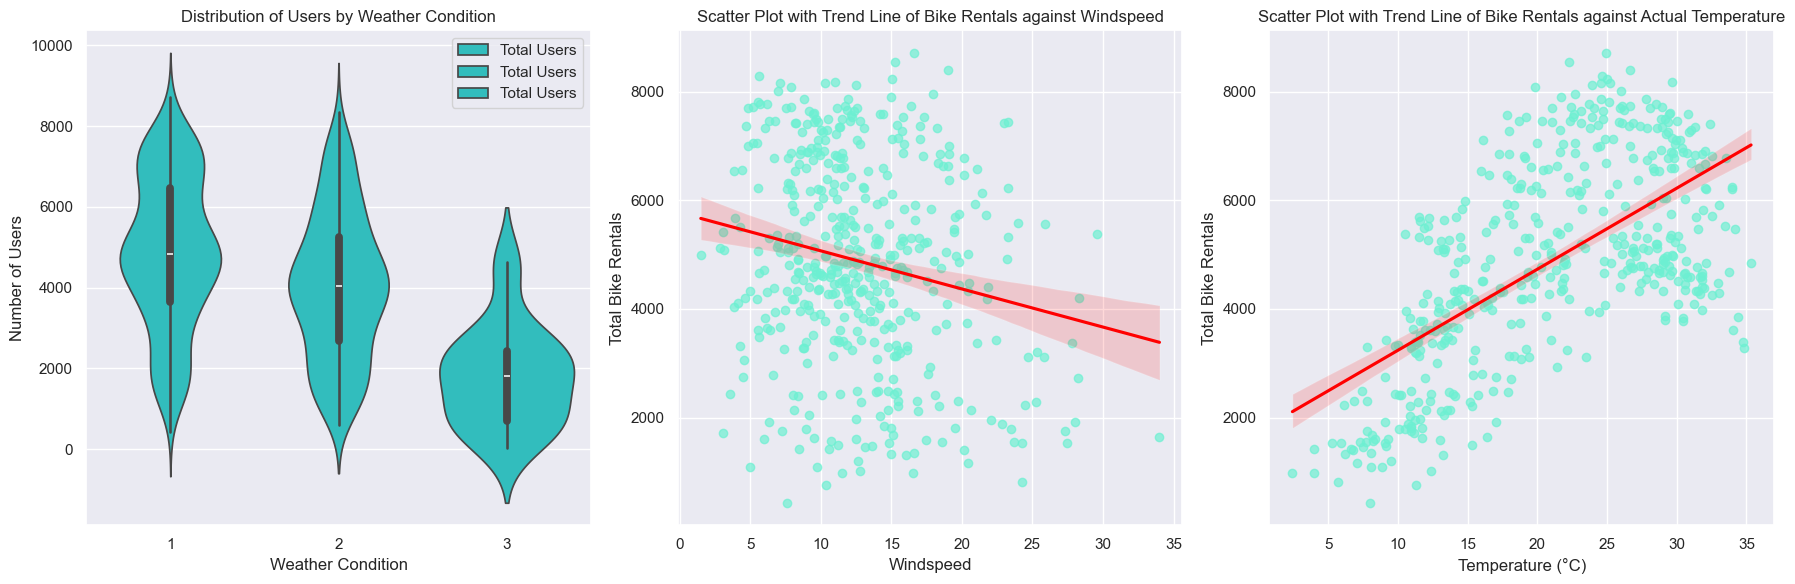

In [54]:
# Seaborn Subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1
sns.violinplot(x='weather_condition', y='total_users', data=df, ax=axes[0], color='#1BD4D4', label='Total Users')



# Set the title and labels
axes[0].set_title('Distribution of Users by Weather Condition')
axes[0].set_xlabel('Weather Condition')
axes[0].set_ylabel('Number of Users')

# Get the artists (violins) from the axes
artists, labels = axes[0].get_legend_handles_labels()


weather_condition_1_data = df[df['weather_condition'] == 1]

# Get the artists (violins) from the axes
artists, labels = axes[0].get_legend_handles_labels()

# Plot 2 - Scatter Plot with Trend Line of Bike Rentals against Windspeed
sns.regplot(x='windspeed', y='total_users', data=weather_condition_1_data, scatter_kws={'alpha':0.7, 'color':'#6DF0D2'}, line_kws={'color':'red'}, ax=axes[1])
axes[1].set_title('Scatter Plot with Trend Line of Bike Rentals against Windspeed')
axes[1].set_xlabel('Windspeed')
axes[1].set_ylabel('Total Bike Rentals')

# Plot 3 - Scatter Plot with Trend Line of Bike Rentals against Actual Temperature
sns.regplot(x='temperature', y='total_users', data=weather_condition_1_data, scatter_kws={'alpha':0.7, 'color':'#6DF0D2'}, line_kws={'color':'red'}, ax=axes[2])
axes[2].set_title('Scatter Plot with Trend Line of Bike Rentals against Actual Temperature')
axes[2].set_xlabel('Temperature (°C)')
axes[2].set_ylabel('Total Bike Rentals')

# Customize layout
fig.tight_layout()

# Show the plot
plt.show()


Users overwhelmingly choose the bike-sharing service during clear weather conditions.
There's a discernible positive correlation between rising temperatures and increased user engagement, with the optimum temperature range identified as 20-25°C.
Conversely, heightened wind speeds show a negative correlation with user numbers, emphasizing an ideal wind speed range between 5-15 kilometres per hour.

In [55]:
# Define custom color palettes
cmap_custom = ['#1BD4D4', '#6DF0D2', '#C7F9EE', '#1AC9E6']

selected_period_df = df[(df['datetime'] >= '2012-09-01') & (df['datetime'] <= '2012-12-31')]

# Identify the start and end dates of the dips (adjust based on your data)
dip1_start_date = '2012-10-24'
dip1_end_date = '2012-11-04'

# Create figure with subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=["Windspeed", "Feeling Temperature", "Before and After Hurricane Sandy", "Total Users Trend"])

# Add Windspeed line chart
fig.add_trace(
    go.Scatter(x=df_filtered['month_year'], y=df_filtered['windspeed'], mode='lines', name='Windspeed',  marker_color=cmap_custom[3]),
    row=1, col=1
)

# Add Feeling Temperature line chart
fig.add_trace(
    go.Scatter(x=df_filtered['month_year'], y=df_filtered['feeling_temperature'], mode='lines', name='Temperature',  marker_color=cmap_custom[1]),
    row=1, col=2
)

# Add Total Users Before and After Hurricane Sandy bar chart
fig.add_trace(
    go.Bar(x=['Two Months Before Hurricane Sandy', 'Two Months After Hurricane Sandy'],
           y=[total_users_before, total_users_after],
           marker_color=['#176BA0', '#1BD4D4']),
    row=2, col=1
)

# Add Total Users Trend with Highlighted Dip
fig.add_trace(
    go.Scatter(x=selected_period_df['datetime'], y=selected_period_df['total_users'],
               mode='lines', name='Total Users Trend (Sep 2011 - Mar 2012)',
               line=dict(color='#176BA0')),
    row=2, col=2
)

# Add circle to highlight the dip
dip1_circle = dict(
    type="circle",
    xref="x4",  # x4 is the subplot with Total Users Trend
    yref="y4",
    x0=dip1_start_date,
    y0=selected_period_df['total_users'].min(),
    x1=dip1_end_date,
    y1=selected_period_df['total_users'].max(),
    line=dict(color='#1BD4D4'),
)

# Update layout with the circle and title for the Total Users Trend subplot
fig.update_layout(
    shapes=[dip1_circle],
    title_text="Impact of Hurricane Sandy",
    xaxis_title="Date",
    yaxis_title="Values",
    xaxis2_title="Date",
    xaxis3_title="Period",
    xaxis4_title="Date",
    yaxis4_title="Total Users"
)

# Remove legends from all subplots
fig.update_layout(showlegend=False)

# Show the figure
fig.show()


Hurricane Sandy caused a significant disruption in user numbers, leading to a steep decline that posed a considerable challenge for the business.
However, there was a gradual recovery post-hurricane, highlighting the company's resilience and adaptive strategies. The bar chart underscores the drop by slightly less than half the users compared to pre-hurricane levels.
It's noteworthy that the temperature and windspeed did not show any anomalies during the hurricane timeframe, suggesting potential inaccuracies in the dataset. Addressing data accuracy is crucial for a comprehensive understanding of the impact of external events on user trends.

In [56]:

# a) Monthly Bike Rentals: Registered vs Casual Users
# Plotting with Seaborn
plt.figure(figsize=(10, 6))

bar1 = sns.barplot(x=monthly_rentals['month'], y=monthly_rentals['registered'], data=monthly_registered_users, color='#1BD4D4', label='Registered Users')
bar2 = sns.barplot(x=monthly_rentals['month'], y=monthly_rentals['casual'], data=monthly_casual_users, color='#C7F9EE', label='Casual Users', bottom=monthly_rentals['registered'])

plt.title('Registered vs Casual Bike Rentals by Month', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Total Bike Rentals', fontsize=15)

# Create a function to display data labels/annotations for each bar
def autolabel_registered(bars, data_values):
    for bar, value in zip(bars.patches, data_values):
        height = bar.get_height()
        plt.annotate(f'{value:.2f}%', 
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, -50),  # 2 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=8)

def autolabel_casual(bars, data_values):
    for bar, value in zip(bars.patches, data_values):
        height = bar.get_height() + monthly_registered_percentage['registered_percentage'][bars.patches.index(bar)]
        plt.annotate(f'{value:.2f}%', 
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 2),  # 2 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=8)

# Calculate the mean percentage for each month
monthly_registered_percentage = df.groupby('month')['registered_percentage'].mean().reset_index()
monthly_casual_percentage = df.groupby('month')['casual_percentage'].mean().reset_index()

# Call autolabel functions for both sets of bars
autolabel_registered(bar1, monthly_registered_percentage['registered_percentage'])
autolabel_casual(bar2, monthly_casual_percentage['casual_percentage'])

plt.legend(loc=(0.03, 0.83))
plt.show()


# b) Scatter Plot of Casual Users by Weekday
plt.subplots(figsize=(10, 6))

sns.boxplot(x='weekday', y='casual', data=df, color='#C7F9EE')

# Customize the plot
plt.title('Scatter Plot of Casual Users by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Casual Users')

# Customize x-axis labels
plt.xticks([i -0.01 for i in range(7)], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

# Show the plot
plt.show()


TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 1000x600 with 0 Axes>

July emerges as the peak month, aligning with the popularity of the 4th of July holiday.
Weekends and the months between May and August witness heightened engagement.

In [ ]:

# Create a subplot with 2 rows and 1 column
fig = make_subplots(rows=2, cols=1, subplot_titles=["Trend of Registered Users", "Box Plot of Registered Users by Weekday"])

# Subplot 1 - Trend of Registered Users (Top Row)
monthly_registered_data = df.groupby('month')['registered'].sum().reset_index()
month_registered = monthly_registered_data['month']
registered = monthly_registered_data['registered']

trace1 = go.Scatter(x=month_registered, y=registered, mode='lines', name='Trend of Registered Users', line=dict(color='#1BD4D4'))
fig.add_trace(trace1, row=1, col=1)

# Subplot 2 - Box Plot of Registered Users by Weekday (Bottom Row)
trace2 = go.Box(x=df['weekday'], y=df['registered'], marker=dict(color='#1BD4D4'))
fig.add_trace(trace2, row=2, col=1)

# Customize x-axis labels for the Box Plot of Registered Users by Weekday
fig.update_xaxes(tickvals=[i  for i in range(7)], ticktext=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], row=2, col=1)

# Adjust layout
fig.update_layout(showlegend=False, height=800, width=1000, title_text="Registered Users Analysis")

# Add x-axis labels
fig.update_xaxes(title_text="Month", row=1, col=1)
fig.update_xaxes(title_text="Day of Week", row=2, col=1)

# Show the plots
fig.show()

Vital for the company's sustainable growth, with a peak in August at 155,000 users.
The pattern shows slow starts and endings during the year, with a preference for weekdays. This shows that since weekdays, people gernally have to travel to work, these registered users mostly use the bikes as their form of communte. Tapping on this and promoting the usage of the bike sharing service would allow Leo Bike Share Co. to follow a eco-friendly ethos.
Leading to strategic recommendations include introducing promotional codes during off-peak periods, weekends, and expanding parking stations in business areas.

In [ ]:
# Seaborn Subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Scatter Plot with Trend Line against Windspeed
sns.regplot(x='windspeed', y='total_users', data=df, scatter_kws={'alpha':0.7, 'color':'#6DF0D2'}, line_kws={'color':'red'}, ax=axes[0, 0])
axes[0, 0].set_title('Scatter Plot with Trend Line of Bike Rentals against Windspeed', fontsize=15)
axes[0, 0].set_xlabel('Windspeed')
axes[0, 0].set_ylabel('Total Bike Rentals')

# Plot 2: Scatter Plot with Trend Line against Humidity
sns.regplot(x='humidity', y='total_users', data=df, scatter_kws={'alpha':0.7, 'color':'#6DF0D2'}, line_kws={'color':'red'}, ax=axes[0, 1])
axes[0, 1].set_title('Scatter Plot with Trend Line of Bike Rentals against Humidity', fontsize=15)
axes[0, 1].set_xlabel('Humidity')
axes[0, 1].set_ylabel('Total Bike Rentals')

# Plot 3: Scatter Plot with Trend Line against Feeling Temperature
sns.regplot(x='feeling_temperature', y='total_users', data=df, scatter_kws={'alpha':0.7, 'color':'#6DF0D2'}, line_kws={'color':'red'}, ax=axes[1, 1])
axes[1, 1].set_title('Scatter Plot with Trend Line of Bike Rentals against Feeling Temperature', fontsize=15)
axes[1, 1].set_xlabel('Temperature (°C)')
axes[1, 1].set_ylabel('Total Bike Rentals')

# Plot 4: Scatter Plot with Trend Line against Actual Temperature
sns.regplot(x='temperature', y='total_users', data=df, scatter_kws={'alpha':0.7, 'color':'#6DF0D2'}, line_kws={'color':'red'}, ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot with Trend Line of Bike Rentals against Actual Temperature', fontsize=15)
axes[1, 0].set_xlabel('Temperature (°C)')
axes[1, 0].set_ylabel('Total Bike Rentals')

# Add title for the entire dashboard
fig.suptitle('Bike Rentals Against Windspeed, Humidity and Temperature', fontsize=24)

# Customize layout
fig.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to accommodate the title

# Show the plot
plt.show()


Feeling temperature and humidity impact users in opposite ways, with users preferring warmer temperatures but lower humidity for cycling. This suggests that higher humidity levels discourage users, as humidity can exacerbate the perceived temperature. Additionally, the relationship between windspeed and temperature differs, with lower windspeed and higher temperatures being more popular among users. Understanding these preferences is essential for tailoring services and optimizing user experiences based on weather conditions.

# Recommendation <a id="part6"></a>

These adaptive measures are intended to bring Leo Bike Share Co. to a place where sustainability, market expansion, and customer happiness are found.

During the winter months, Leo Bike Share Co. envisions a proactive approach to incentivize riding in colder temperatures. Special promotions and discounts during this season seek to cultivate a culture of year-round ridership, encouraging users to embrace biking even in less favourable weather conditions.  

As the year draws to a close, Leo Bike Share Co. strategically positions its marketing efforts to coincide with festive seasons such as Christmas and the New Year. Promotional campaigns featuring free rides or exclusive discounts during holiday periods are introduced, enticing more riders to engage with the bike-sharing service during these celebratory times.  Taking inspiration from successful models like Gojek, the company explores innovative holiday promotions. This may include the introduction of promo codes or the provision of free bike rides in specific areas during the holiday season, enhancing brand visibility and engagement. 

Recognising the seasonal ebb and flow, Leo Bike Share Co. ensures that its app remains in optimal working condition during the fall season. By strategically planning maintenance schedules and avoiding disruptions during mellow periods from November to March, the company aims to provide a reliable and seamless service to users.  

Conducting thorough research to identify popular areas during the fall and winter becomes a pivotal strategy. Optimisation of bike station placements, potentially increasing stations in strategic locations, aligns with the heightened demand during specific periods. 

To cater to the preferences of registered users, the company introduces workday passes, offering discounts during peak hours. Emphasising the environmental benefits of biking positions Leo Bike Share Co. as a sustainable and eco-friendly transportation option, encouraging users to make greener choices during their daily commutes.  

Weekend campaigns are strategically scheduled to target casual users during their leisure days. By highlighting the convenience and enjoyment of using bikes on weekends, Leo Bike Share Co. aims to tap into this demographic and promote a healthier and more enjoyable weekend experience. 



# Reflection<a id="part7"></a>

Generative AI tools, known for their ability to generate human-like responses, provided intriguing insights into Mode Analytics' market standing. However, the perspectives offered by these tools, including ChatGPT, exhibited a degree of inconsistency, making it challenging to derive a conclusive consensus regarding Mode Analytics' market leadership.

On the other hand, non-generative AI tools brought a more structured and data-driven perspective to the analysis. Industry reports indicated positive trends for Mode Analytics, citing sustained growth, high customer satisfaction, and a significant market share. This sentiment was echoed in Google Search results, providing a more cohesive narrative compared to the varied opinions presented by generative tools.

It is clear from assessing the information's dependability and accuracy that generative AI systems might not be as precise as their non-generative equivalents by design. Users are advised to take a critical stance, verify material with reputable sources, and make use of fact-checking services in order to remedy this. This process protects against any mistakes and guarantees a more accurate depiction of real data.

Furthermore, it's critical to recognise and address the shortcomings of generative AI technologies. These instruments are prone to producing accurate yet believable information, biases, and hallucinations. Users can utilise techniques like cross-verification, careful examination of training data, critical thinking, and adding human oversight to content creation procedures to mitigate these dangers. By addressing potential errors and moral dilemmas, these procedures improve the accuracy of data obtained via generative AI technologies.

All in all, given the fact that generative AI is still evolving and comes with its own set of inabilities, it is crucial not to soley rely on these platform to make conclusions. However, use them as guiding stones to create an ouline but use the human's critical thinking ability to discern the next course of action.

# References<a id="part8"></a>

- OpenAI. (2024, January). ChatGPT (Version 3.5) [Computer software]. Retrieved from https://www.openai.com
- February 2012 Calendar – United States. (n.d.). https://www.timeanddate.com/calendar/monthly.html?year=2012&month=2&country=1
- Hurricane sandy fast facts. (n.d.). CNN.https://edition.cnn.com/2013/07/13/world/americas/hurricane-sandy-fast-facts/index.html
- https://colab.research.google.com/drive/12xNrhxCV5tT2oON1xipYUmFIRHv_awdD#scrollTo=9IIJIqQ-uKXk
- Andrewrizk. (n.d.). Predicting-Washington-Bike-Sharing/3_Bike-Sharing_GroupE_Final.ipynb at master · andrewrizk/Predicting-Washington-Bike-Sharing. GitHub. https://github.com/andrewrizk/Predicting-Washington-Bike-Sharing/blob/master/3_Bike-Sharing_GroupE_Final.ipynb
    